<a href="https://colab.research.google.com/github/nyunu/study/blob/main/%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0%20%EB%B6%84%EC%84%9D%20%EB%B0%8F%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rcParams

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
df2020_1 = pd.read_csv("/content/drive/MyDrive/교통사고/날씨 데이터/최종 데이터/npa2020년교통관련_날씨반영.csv")
df2020_2 = pd.read_csv("/content/drive/MyDrive/교통사고/날씨 데이터/최종 데이터/2020년교통관련_날씨반영.csv")
df2021 = pd.read_csv("/content/drive/MyDrive/교통사고/날씨 데이터/최종 데이터/2021년교통관련_날씨반영.csv")

# **데이터 전처리**

## **날씨 데이터 전처리**


### **날씨 데이터 다운로드 후 정리**
-> 습도, 풍속 등등 같은 방식으로 반복

In [ ]:
filepath = '/Users/leeshinhaeng/BDAA 공모전/경찰청 치안데이터 공모전/날씨데이터/대전시'
filelist = os.listdir(filepath)

In [ ]:
mist2020 = pd.read_csv(filepath + '/' + '목동_습도_202001_202012.csv')
mist2021_first = pd.read_csv(filepath + '/' + '목동_습도_202101_202106.csv')
mist2021_last = pd.read_csv(filepath + '/' + '목동_습도_20210701_20211231.csv')

In [ ]:
mist1 = mist2020[(mist2020['hour']==200.0) & (mist2020['forecast']==7.0)]
mist2 = mist2021_first[(mist2021_first['hour']==200.0) & (mist2021_first['forecast']==7.0)]
mist3 = mist2021_last[(mist2021_last['hour']==200.0) & (mist2021_last['forecast']==7.0)]

In [ ]:
mist1.columns = ['날짜', '시간','이후시간', '습도']
mist2.columns = ['날짜', '시간','이후시간', '습도']
mist3.columns = ['날짜', '시간','이후시간', '습도']

In [ ]:
result1 = pd.concat([mist1, mist2, mist3])
result1.reset_index(drop=True, inplace=True)

In [ ]:
result1['날짜'] = date_list

In [ ]:
daejeon_mist = result1

In [ ]:
daejeon_mist['도시'] = '대전시'

In [ ]:
daejeon_mist.drop(['시간','이후시간'], axis=1, inplace=True)
daejeon_mist

,날짜,습도,도시
0,2020-01-01,65.0,대전시
1,2020-01-02,70.0,대전시
2,2020-01-03,60.0,대전시
3,2020-01-04,60.0,대전시
4,2020-01-05,40.0,대전시
...,...,...,...
726,2021-12-27,65.0,대전시
727,2021-12-28,65.0,대전시
728,2021-12-29,60.0,대전시
729,2021-12-30,70.0,대전시


In [ ]:
daejeon_mist.to_csv('1차완성날씨데이터/대전시습도.csv', index=False, encoding='utf-8-sig')

### **날씨 데이터 결합**
-> 대전시 예제 ) 다른 시들도 같은 방식으로 반복

In [ ]:
filepath = '1차완성날씨데이터/'
daejeon = []
filelist = os.listdir(filepath)
for file in filelist:
    if '대전시' in file:
        daejeon.append(file)

In [ ]:
daejeon

['대전시습도.csv',
 '대전시강수량.csv',
 '대전시평균기온.csv',
 '대전시적설량.csv',
 '대전시강수확률.csv',
 '대전시풍속.csv',
 '대전시강수형태.csv']

In [ ]:
dj = pd.read_csv(filepath + '대전시습도.csv')
dj

,날짜,습도,도시
0,2020-01-01,65.0,대전시
1,2020-01-02,70.0,대전시
2,2020-01-03,60.0,대전시
3,2020-01-04,60.0,대전시
4,2020-01-05,40.0,대전시
...,...,...,...
726,2021-12-27,65.0,대전시
727,2021-12-28,65.0,대전시
728,2021-12-29,60.0,대전시
729,2021-12-30,70.0,대전시


In [ ]:
for i in range(1, len(daejeon)):
    df = pd.read_csv(filepath + daejeon[i])
    dj[df.columns[1]] = df[df.columns[1]]
    print(df.columns[1])

강수량
평균기온
적설량
강수확률
풍속
강수형태


In [ ]:
dj

,날짜,습도,도시,강수량,평균기온,적설량,강수확률,풍속,강수형태
0,2020-01-01,65.0,대전시,0.0,2.0,0.0,30.0,1.1,0.0
1,2020-01-02,70.0,대전시,0.0,4.0,0.0,30.0,1.2,0.0
2,2020-01-03,60.0,대전시,0.0,5.0,0.0,0.0,1.1,0.0
3,2020-01-04,60.0,대전시,0.0,6.0,0.0,20.0,1.3,0.0
4,2020-01-05,40.0,대전시,0.0,5.0,0.0,20.0,0.8,0.0
...,...,...,...,...,...,...,...,...,...
726,2021-12-27,65.0,대전시,0.0,-1.0,0.0,30.0,1.6,0.0
727,2021-12-28,65.0,대전시,0.0,2.0,0.0,30.0,1.2,0.0
728,2021-12-29,60.0,대전시,0.0,4.0,0.0,20.0,2.4,0.0
729,2021-12-30,70.0,대전시,0.0,-1.0,0.0,20.0,3.6,0.0


In [ ]:
dj.to_csv('날씨완성데이터/대전시날씨.csv', encoding='utf-8-sig', index=False)

* 전체 결합

In [ ]:
result = pd.DataFrame()
result = result.append(dj)
result = result.append(cn)
result = result.append(sj)
result.reset_index(drop=True,inplace=True)

In [ ]:
result.to_csv('날씨완성데이터/최종날씨데이터.csv',encoding='utf-8-sig',index=False)

## **데이터 결합**

In [ ]:
# 347 -> 000347로 변환 (여섯자리로 맞추기 위해 앞을 0으로 채움)
df2020_1['RECV_CPLT_TM'] = df2020_1['RECV_CPLT_TM'].apply(lambda x : str(x).zfill(6))
# 날짜만 나와있는 열 + 시간만 나와있는 열
df2020_1['RECV_CPLT_DM'] = df2020_1['RECV_CPLT_DT'] + " " + df2020_1['RECV_CPLT_TM']
# 날짜+시간 datetime 타입으로 변환
df2020_1['RECV_CPLT_DM'] = pd.to_datetime(df2020_1['RECV_CPLT_DM'])
df2020_1.head()

,RECV_CPLT_DT,RECV_CPLT_TM,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,성별,연월일,습도,강수량,평균기온,적설량,강수확률,풍속,강수형태,RECV_CPLT_DM
0,2020/01/01,003240,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,대전청,종결요청,교통불편,남성,2020-01-01,65,0,2,0,30,1.1,0,2020-01-01 00:32:40
1,2020/01/01,003532,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,대전청,종결요청,음주운전,남성,2020-01-01,65,0,2,0,30,1.1,0,2020-01-01 00:35:32
2,2020/01/01,002135,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0,2020-01-01 00:21:35
3,2020/01/01,004301,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0,2020-01-01 00:43:01
4,2020/01/01,184335,대전광역시 동구 가양동 630,127.445780,36.345500,N,대전청,종결요청,교통사고,불상,2020-01-01,65,0,2,0,30,1.1,0,2020-01-01 18:43:35


In [ ]:
# df2020_2, df2021에 없는 열 삭제 -> 해당 값을 담은 열이 이미 있으므로 괜찮음
df2020_1.drop(['RECV_CPLT_DT', 'RECV_CPLT_TM'], axis = 1, inplace = True)

In [ ]:
# df2020_2, df2021 데이터와 같게 열 배열
df2020_1 = df2020_1[['RECV_CPLT_DM', 'HPPN_OLD_ADDR', 'HPPN_X', 'HPPN_Y',
                     'SME_EVT_YN', '경찰청구분', '사건상태구분', '사건종별코드', '성별', '연월일', '습도',
                     '강수량', '평균기온', '적설량', '강수확률', '풍속', '강수형태']]

In [ ]:
# df2020_2, df2021 데이터와 같게 열 이름 변경
df2020_1.rename(columns={'HPPN_OLD_ADDR':'HPPN_PNU_ADDR'}, inplace = True)

In [ ]:
# 접수청 열 삭제
df2020_2.drop(['RECV_DEPT_NM', '날짜'], axis = 1, inplace = True)
df2021.drop(['RECV_DEPT_NM', '날짜'], axis = 1, inplace = True)

In [ ]:
# 타입을 같게 하기 위해 RECV_CPLT_DM 날짜형 변환
df2020_2['RECV_CPLT_DM'] = "20" + df2020_2['RECV_CPLT_DM']
df2021['RECV_CPLT_DM'] = "20" + df2021['RECV_CPLT_DM']
df2020_2['RECV_CPLT_DM'] = pd.to_datetime(df2020_2['RECV_CPLT_DM'])
df2021['RECV_CPLT_DM'] = pd.to_datetime(df2021['RECV_CPLT_DM'])

In [ ]:
df2020_1.head()

,RECV_CPLT_DM,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,성별,연월일,습도,강수량,평균기온,적설량,강수확률,풍속,강수형태
0,2020-01-01 00:32:40,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,대전청,종결요청,교통불편,남성,2020-01-01,65,0,2,0,30,1.1,0
1,2020-01-01 00:35:32,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,대전청,종결요청,음주운전,남성,2020-01-01,65,0,2,0,30,1.1,0
2,2020-01-01 00:21:35,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0
3,2020-01-01 00:43:01,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0
4,2020-01-01 18:43:35,대전광역시 동구 가양동 630,127.445780,36.345500,N,대전청,종결요청,교통사고,불상,2020-01-01,65,0,2,0,30,1.1,0


In [ ]:
df2020_2.head()

,RECV_CPLT_DM,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,성별,연월일,습도,강수량,평균기온,적설량,강수확률,풍속,강수형태
0,2020-12-01 08:17:50,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,충남청,종결요청,교통사고,여성,2020-12-01,55,0,2,0,20,1.3,0
1,2020-12-01 03:24:26,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN,대전청,종결요청,음주운전,남성,2020-12-01,50,0,3,0,20,1.1,0
2,2020-12-01 07:37:18,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN,충남청,종결요청,교통불편,남성,2020-12-01,55,0,2,0,20,1.3,0
3,2020-12-01 07:08:44,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,대전청,종결요청,교통사고,남성,2020-12-01,50,0,3,0,20,1.1,0
4,2020-12-01 07:09:20,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,대전청,종결요청,교통사고,여성,2020-12-01,50,0,3,0,20,1.1,0


In [ ]:
df2021.head()

,RECV_CPLT_DM,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,성별,연월일,습도,강수량,평균기온,적설량,강수확률,풍속,강수형태
0,2021-03-07 00:02:48,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN,충남청,종결요청,음주운전,남성,2021-03-07,60,0,10,0,30,3.3,0
1,2021-03-07 00:09:04,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y,충남청,종결요청,교통불편,남성,2021-03-07,60,0,10,0,30,3.3,0
2,2021-03-07 00:07:54,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,대전청,종결요청,교통사고,여성,2021-03-07,60,0,10,0,30,1.5,0
3,2021-03-07 00:15:27,대전광역시 유성구 상대동 471-2,127.339334,36.346899,NaN,대전청,종결요청,교통사고,남성,2021-03-07,60,0,10,0,30,1.5,0
4,2021-03-07 00:12:08,충청남도 공주시 우성면 평목리,127.090733,36.453397,NaN,충남청,종결요청,교통위반,여성,2021-03-07,60,0,10,0,30,3.3,0


In [ ]:
# 데이터 결합
df = pd.concat([df2020_1, df2020_2, df2021], axis = 0)
df.head()

,RECV_CPLT_DM,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,성별,연월일,습도,강수량,평균기온,적설량,강수확률,풍속,강수형태
0,2020-01-01 00:32:40,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,대전청,종결요청,교통불편,남성,2020-01-01,65,0,2,0,30,1.1,0
1,2020-01-01 00:35:32,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,대전청,종결요청,음주운전,남성,2020-01-01,65,0,2,0,30,1.1,0
2,2020-01-01 00:21:35,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0
3,2020-01-01 00:43:01,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0
4,2020-01-01 18:43:35,대전광역시 동구 가양동 630,127.445780,36.345500,N,대전청,종결요청,교통사고,불상,2020-01-01,65,0,2,0,30,1.1,0


In [ ]:
df['성별'] = df['RPTER_SEX'].map({1:'남성',2:'여성',3:'불상'})
df['요일'] = df['RECV_CPLT_DM'].dt.day_name()
df['do'] = df.HPPN_PNU_ADDR.str.split(' ').str[0]
df_new = df.loc[(df.do == "충청남도") | (df.do == "세종특별자치시") | (df.do == "대전광역시")]
df_new['HPPN_PNU_ADDR'].replace('충청남도', '', regex=True, inplace=True)
df_new['HPPN_PNU_ADDR'] = df_new['HPPN_PNU_ADDR'].str.lstrip()
df_new['지역'] = df_new.HPPN_PNU_ADDR.str.split(' ').str[0]
df_new.drop(['do'], axis = 1, inplace = True)
df_new = df_new[['RECV_CPLT_DM', '요일', 'HPPN_PNU_ADDR', '지역', 'HPPN_X', 'HPPN_Y',
         'SME_EVT_YN', '경찰청구분', '사건상태구분', '사건종별코드', '성별', '연월일', '습도',
         '강수량', '평균기온', '적설량', '강수확률', '풍속', '강수형태']]
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,성별,연월일,습도,강수량,평균기온,적설량,강수확률,풍속,강수형태
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,남성,2020-01-01,65,0,2,0,30,1.1,0
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,남성,2020-01-01,65,0,2,0,30,1.1,0
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,불상,2020-01-01,65,0,2,0,30,1.1,0


In [ ]:
df_new['사건종별코드'].value_counts()

교통사고       140206
음주운전        31610
교통불편        30944
교통위반        16925
인피도주           21
사망.대형사고         9
Name: 사건종별코드, dtype: int64

## **교통관련 데이터만 추출**

In [ ]:
df_new = df_new.loc[(df_new.사건종별코드 == "교통사고") | (df_new.사건종별코드 == "음주운전") | (df_new.사건종별코드 == "교통불편") |
                    (df_new.사건종별코드 == "교통위반") | (df_new.사건종별코드 == "사망.대형사고")]

## **경찰서명 추가**

#### 대전광역시 경찰서

In [ ]:
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('대전광역시') & df_new['HPPN_PNU_ADDR'].str.contains('중구'), '경찰서명'] = '대전중부경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('대전광역시') & df_new['HPPN_PNU_ADDR'].str.contains('동구'), '경찰서명'] = '대전동부경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('대전광역시') & df_new['HPPN_PNU_ADDR'].str.contains('가수원동|가장동|관저동|괴곡동|괴정동|내동|도마동|도안동|매노동|변동|복수동|봉곡동|산직동|오동|용문동|용촌동|우명동|원정동|장안동|정림동|평촌동|흑석동'), '경찰서명'] = '대전서부경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('대전광역시') & df_new['HPPN_PNU_ADDR'].str.contains('대덕구'), '경찰서명'] = '대전대덕경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('대전광역시') & df_new['HPPN_PNU_ADDR'].str.contains('갈마동|둔산동|만년동|월평동|탄방동'), '경찰서명'] = '대전둔산경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('대전광역시') & df_new['HPPN_PNU_ADDR'].str.contains('유성구'), '경찰서명'] = '대전유성경찰서'

In [ ]:
df_new.loc[(df_new['경찰서명'].isnull() )& (df_new['지역']=='대전광역시'), '경찰서명'] = '대전둔산경찰서'

#### 세종특별자치시 경찰서

In [ ]:
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('세종특별자치시') & df_new['HPPN_PNU_ADDR'].str.contains('가람동|고운동|나성동|다정동|대평동|도담동|반곡동|보람동|산울동|새롬동|소담동|아름동|어진동|종촌동|집현동|한솔동|해밀동|금남면|연기면|장군면'), '경찰서명'] = '세종남부경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('세종특별자치시') & df_new['경찰서명'].isnull(), '경찰서명'] = '세종북부경찰서'

#### 충청남도 경찰서

In [ ]:
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('천안시 서북구|성환읍|성거읍|직산읍|입장면'), '경찰서명'] = '천안서북경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('천안시 동남구|목천읍|풍세면|북면|성남면|수신면|병천면|동면|구성동'), '경찰서명'] = '천안동남경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('서산시'), '경찰서명'] = '서산경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('논산시|계룡시'), '경찰서명'] = '논산경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('아산시'), '경찰서명'] = '아산경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('공주시'), '경찰서명'] = '공주경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('보령시'), '경찰서명'] = '보령경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('당진군|당진시'), '경찰서명'] = '당진경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('홍성군'), '경찰서명'] = '홍성경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('예산군'), '경찰서명'] = '예산경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('부여군'), '경찰서명'] = '부여경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('서천군'), '경찰서명'] = '서천경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('금산군'), '경찰서명'] = '금산경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('청양군'), '경찰서명'] = '청양경찰서'
df_new.loc[df_new['HPPN_PNU_ADDR'].str.contains('태안군'), '경찰서명'] = '태안경찰서'

# **EDA**

## **지역별**

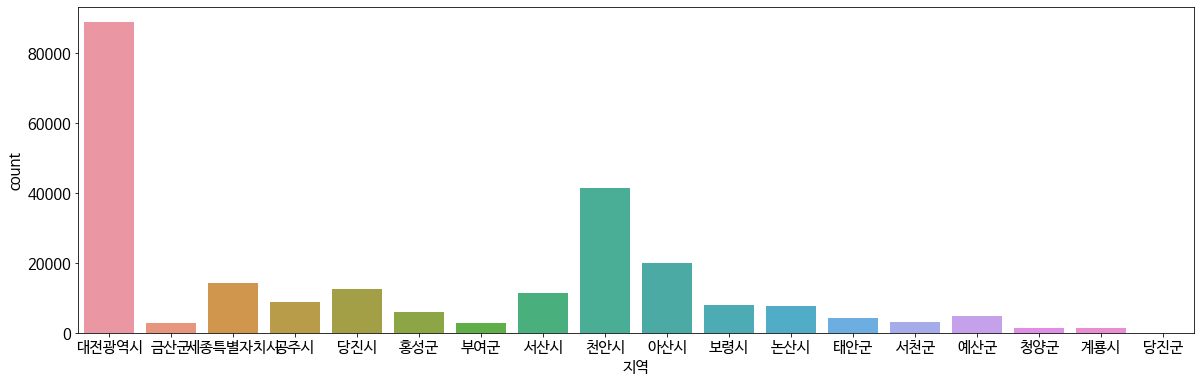

In [ ]:
plt.rc('font', size=15)
plt.figure(figsize = (20,6))
sns.countplot(data = df_new, x = '지역')
plt.show()

## **경찰서별**

### **전체경찰서**

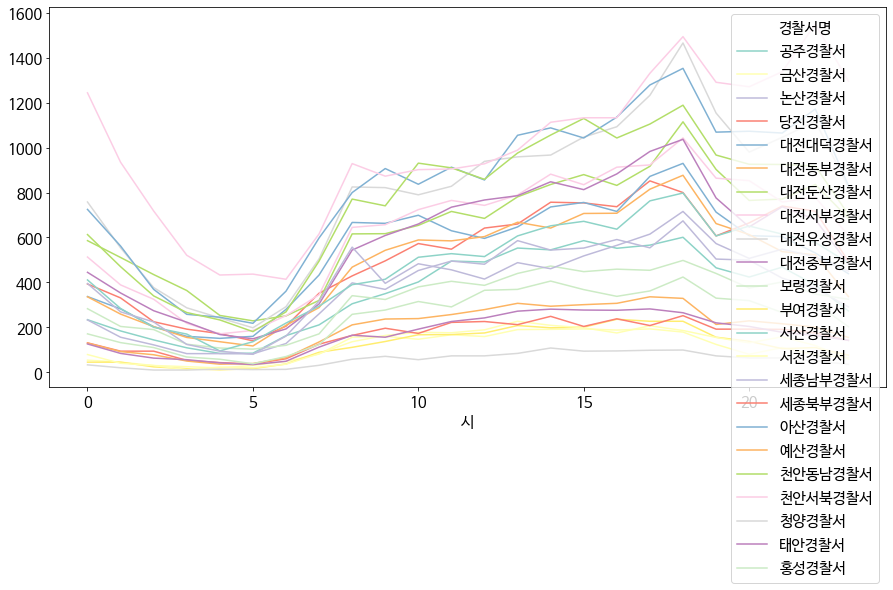

In [ ]:
plt.rc('font', size=15)
df1 = df_new.groupby(['시','경찰서명'])
df1.size().unstack().plot(kind = 'line', figsize = (15,7))
plt.show()

### **대전 내 경찰서**

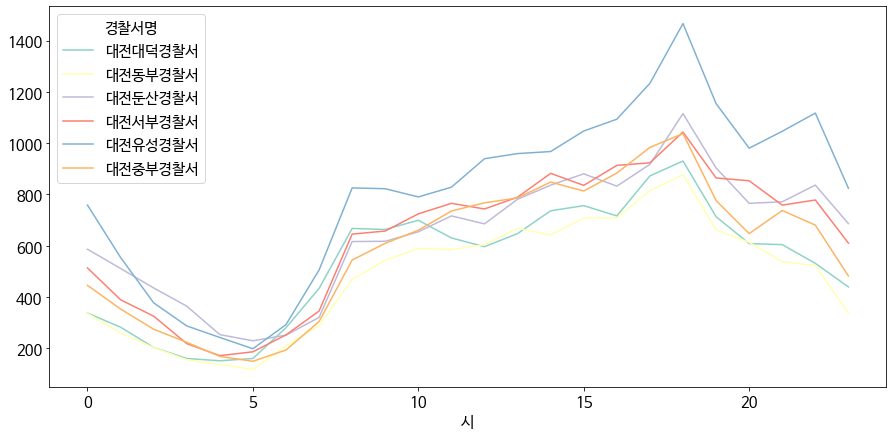

In [ ]:
plt.rc('font', size=15)
df1 = df_new[df_new['경찰서명'].str.contains('대전')].groupby(['시','경찰서명'])
df1.size().unstack().plot(kind = 'line', figsize = (15,7))
plt.show()

## **시간별**

In [ ]:
df_new['RECV_CPLT_DM'] = pd.to_datetime(df_new['RECV_CPLT_DM'], format = '%y/%m/%d %H:%M:%S')
df_new['연도'] = df_new['RECV_CPLT_DM'].dt.year
df_new['월'] = df_new['RECV_CPLT_DM'].dt.month
df_new['일'] = df_new['RECV_CPLT_DM'].dt.day
df_new['시'] = df_new['RECV_CPLT_DM'].dt.hour
df_new['분'] = df_new['RECV_CPLT_DM'].dt.minute
df_new['초'] = df_new['RECV_CPLT_DM'].dt.second

### **월별**

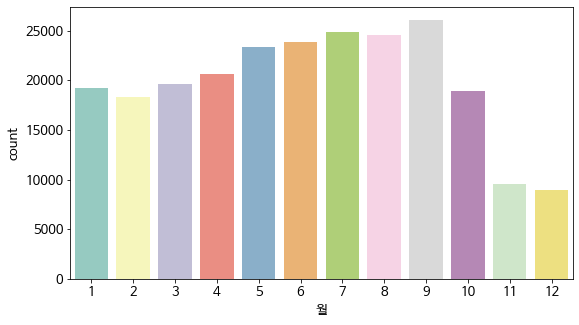

In [ ]:
plt.rc('font', size=13)
plt.figure(figsize = (9,5))
sns.countplot(data = df_new, x = '월')
plt.show()

### **일별**

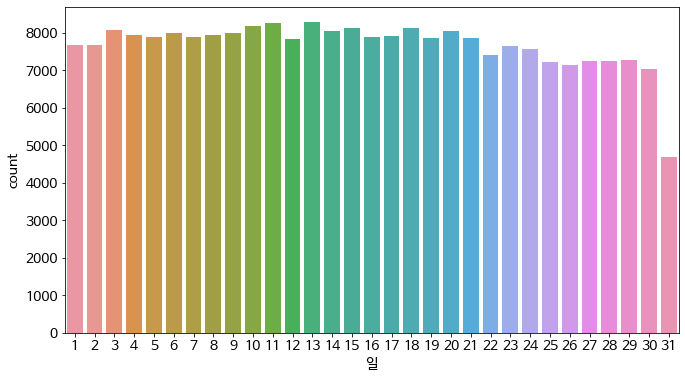

In [ ]:
plt.rc('font', size=14)
plt.figure(figsize = (11,6))
sns.countplot(data = df_new, x = '일')
plt.show()

### **시간별**

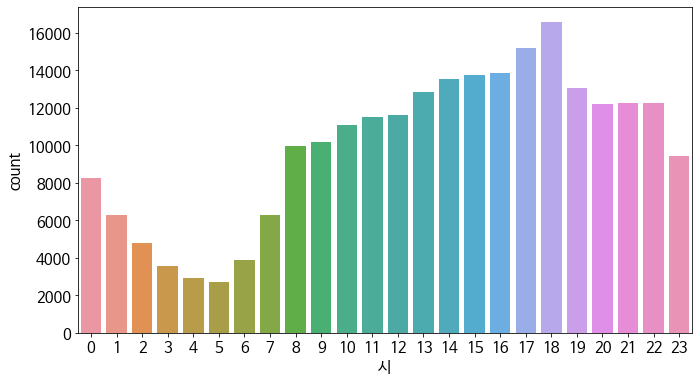

In [ ]:
plt.rc('font', size=15)
plt.figure(figsize = (11,6))
sns.countplot(data = df_new, x = '시')
plt.show()

### **시간별 사건 빌생 종류**

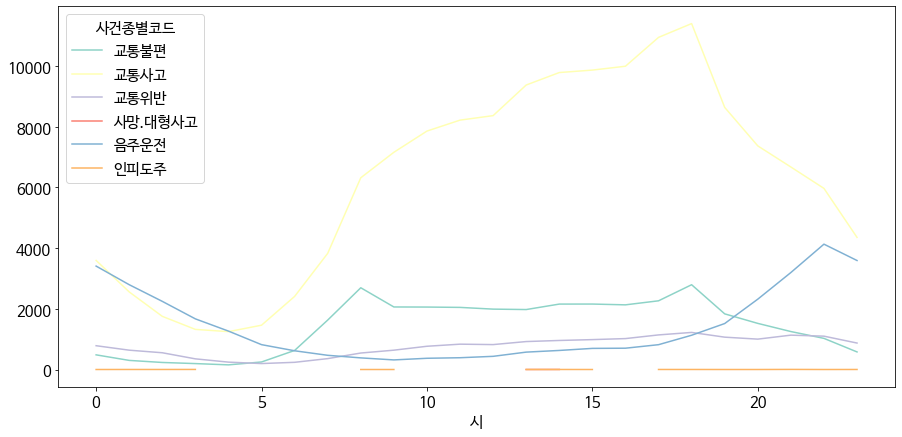

In [ ]:
plt.rc('font', size=15)
df1 = df_new.groupby(['시','사건종별코드'])
df1.size().unstack().plot(kind = 'line', figsize = (15,7))
plt.show()

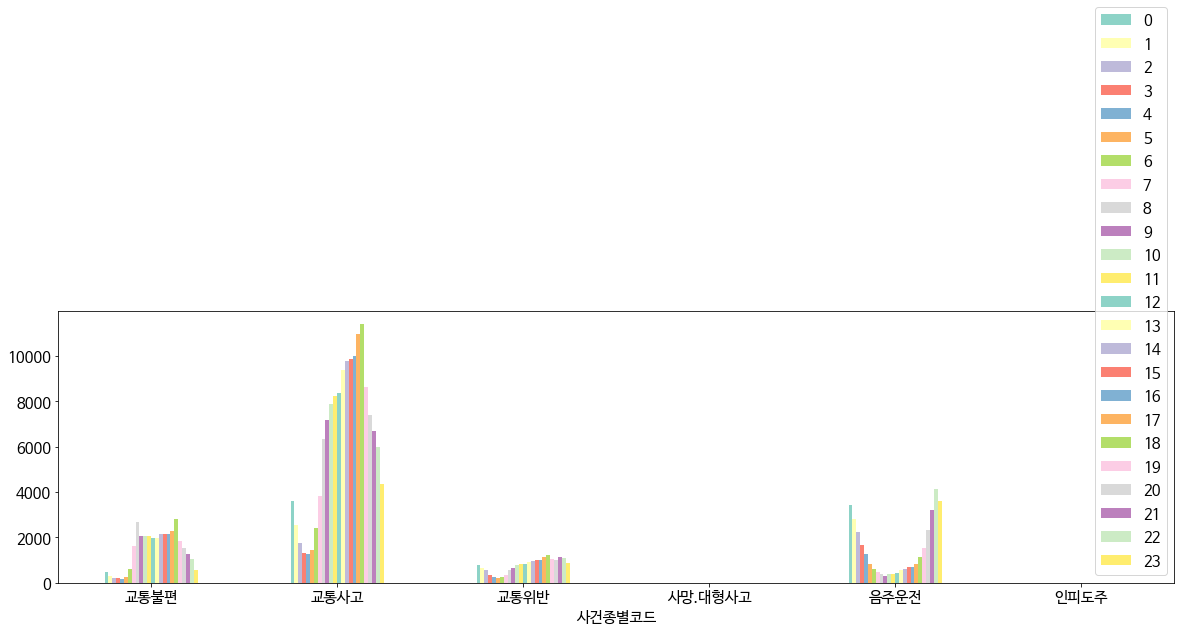

In [ ]:
table1 = df_new.pivot_table(index=['사건종별코드'],columns=['시'],aggfunc='size')
plt.rc('font', size = 15)
table1.plot(kind = 'bar', rot = 0, figsize = (20,5))
plt.legend()

### **시간대별** - 새벽, 출근시간. 오전, 오후, 퇴근시간. 저녁

In [ ]:
def convert(x) :
  if x >= 0 and x < 6 :
    x = '새벽'
    return x
  elif x >= 6 and x < 9 :
    x = '출근시간'
    return x
  elif x >= 9 and x < 12 :
    x = '오전'
    return x
  elif x >= 12 and x < 17 :
    x = '오후'
    return x
  elif x >= 17 and x < 20 :
    x = '퇴근시간'
    return x
  else :
    x = '저녁'
    return x

In [ ]:
df_new['시간대'] = df_new['시'].apply(convert)

In [ ]:
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,...,평균기온_범주형,풍속_범주형,강수확률_범주형,연도,월,일,시간,분,초,시간대
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,...,"(0, 5]","(1.0, 1.5]","(20, 50]",2020,1,1,0,32,40,새벽
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,...,"(0, 5]","(1.0, 1.5]","(20, 50]",2020,1,1,0,35,32,새벽
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,...,"(0, 5]","(1.0, 1.5]","(20, 50]",2020,1,1,0,21,35,새벽
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,...,"(0, 5]","(1.0, 1.5]","(20, 50]",2020,1,1,0,43,1,새벽
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,...,"(0, 5]","(1.0, 1.5]","(20, 50]",2020,1,1,18,43,35,퇴근시간


In [ ]:
cnt = df_new.groupby('시간대')[['시간']].count()
cnt

,시간
시간대,
새벽,28545
오전,32729
오후,65567
저녁,46109
출근시간,20127
퇴근시간,44785


- 특이점이 오후 시간대 (12시에서 17시 사이)가 교통관련 문제가 제일 많이 발생했다.

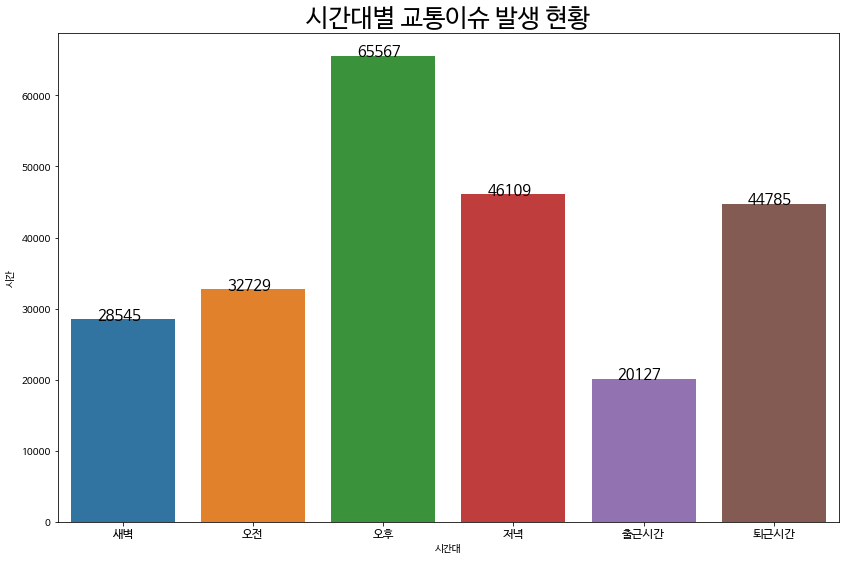

In [ ]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = df_new,
            x = cnt.index,
           y = cnt['시간'])
sns.set_palette('Set3')
plt.xticks(size=12)
plt.title('시간대별 교통이슈 발생 현황', size=25)
for i, num in enumerate(cnt['시간']):
    plt.text(i-0.2, num+5, cnt['시간'][i], size=15)

plt.show()

### **분기별** - 1분기, 2분기, 3분기, 4분기

In [ ]:
def convert_qtr(x) :
  if x == 1 or x == 2 or x == 3 :
    x = '1분기'
    return x
  elif x == 4 or x == 5 or x == 6 :
    x = '2분기'
    return x
  elif x == 7 or x == 8 or x == 9 :
    x = '3분기'
    return x
  else:
    x = '4분기'
    return x

In [ ]:
df_new['분기'] = df_new['월'].apply(convert_qtr)

In [ ]:
cnt_qrt = df_new.groupby('분기')[['월']].count()
cnt_qrt

,월
분기,
1분기,57184
2분기,67826
3분기,75482
4분기,37370


- 3분기 (7,8,9월)에 사고가 제일 많이 발생한 것으 확인할 수 있다
- 그런데, 의외로 겨울에 교통사고가 적게 난 것을 알 수 있다.

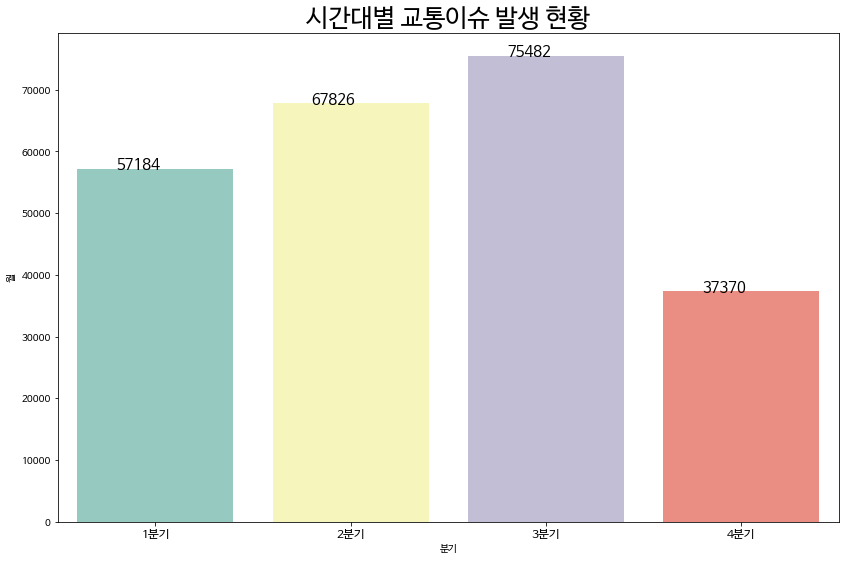

In [ ]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = df_new,
            x = cnt_qrt.index,
           y = cnt_qrt['월'])
sns.set_palette('Set3')
plt.xticks(size=12)
plt.title('시간대별 교통이슈 발생 현황', size=25)
for i, num in enumerate(cnt_qrt['월']):
    plt.text(i-0.2, num+5, cnt_qrt['월'][i], size=15)

plt.show()

In [ ]:
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,...,연도,월,일,시간,분,초,시간대,분기,시,경찰서명
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,...,2020,1,1,0,32,40,새벽,1분기,0,대전둔산경찰서
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,...,2020,1,1,0,35,32,새벽,1분기,0,대전유성경찰서
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,...,2020,1,1,0,21,35,새벽,1분기,0,대전유성경찰서
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,...,2020,1,1,0,43,1,새벽,1분기,0,대전중부경찰서
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,...,2020,1,1,18,43,35,퇴근시간,1분기,18,대전동부경찰서


### **공휴일 및 요일**

In [ ]:
df_new['연월일'] = pd.to_datetime((df_new.RECV_CPLT_DM.str.split(' ')).str.get(0))

#### **공휴일 api를 통해 공휴일 파악**

In [ ]:
AUTH_KEY = 'InEyVgv5KF549ohjsbz%2BUHDjXmXES%2Ft8k7YwdGg9EnORnHaCpCQPmsoxhXtXHi7jGr6ESl0Mj3tQmftNkI0nvg%3D%3D'

In [ ]:
import requests
import datetime
from bs4 import BeautifulSoup
datenames = []
isholidays=[]
locdates = []
weeknames=[]
def print_whichday(year, month, day) :
    r = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    aday = datetime.date(year, month, day)
    bday = aday.weekday()
    return r[bday]

def get_request_query(url, operation, params, serviceKey):
    import urllib.parse as urlparse
    params = urlparse.urlencode(params)
    request_query = url + '/' + operation + '?' + params + '&' + 'serviceKey' + '=' + serviceKey
    return request_query

# year = 2022
#일반 인증키(Encoding)
mykey = "InEyVgv5KF549ohjsbz%2BUHDjXmXES%2Ft8k7YwdGg9EnORnHaCpCQPmsoxhXtXHi7jGr6ESl0Mj3tQmftNkI0nvg%3D%3D"
for n in [2020, 2021]:
    for month in range(1,13):
        year = n
        if month < 10:
            month = '0' + str(month)
        else:
            month = str(month)

        url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService'
        #공휴일 정보 조회
        operation = 'getRestDeInfo'
        params = {'solYear':year, 'solMonth':month}

        request_query = get_request_query(url, operation, params, mykey)
        get_data = requests.get(request_query)

        if True == get_data.ok:
            soup = BeautifulSoup(get_data.content, 'html.parser')

            item = soup.findAll('item')
            #print(item);
            for i in item:

                day = int(i.locdate.string[-2:])
                weekname = print_whichday(int(year), int(month), day)
                print(i.datename.string, i.isholiday.string, i.locdate.string, weekname)
                datenames.append(i.datename.string)
                isholidays.append(i.isholiday.string)
                locdates.append(i.locdate.string)
                weeknames.append(weekname)

1월1일 Y 20200101 수요일
설날 Y 20200124 금요일
설날 Y 20200125 토요일
설날 Y 20200126 일요일
설날 Y 20200127 월요일
삼일절 Y 20200301 일요일
제21대 국회의원선거 Y 20200415 수요일
부처님오신날 Y 20200430 목요일
어린이날 Y 20200505 화요일
현충일 Y 20200606 토요일
광복절 Y 20200815 토요일
임시공휴일 Y 20200817 월요일
추석 Y 20200930 수요일
추석 Y 20201001 목요일
추석 Y 20201002 금요일
개천절 Y 20201003 토요일
한글날 Y 20201009 금요일
기독탄신일 Y 20201225 금요일
1월1일 Y 20210101 금요일
설날 Y 20210211 목요일
설날 Y 20210212 금요일
설날 Y 20210213 토요일
삼일절 Y 20210301 월요일
어린이날 Y 20210505 수요일
부처님오신날 Y 20210519 수요일
현충일 Y 20210606 일요일
광복절 Y 20210815 일요일
대체공휴일 Y 20210816 월요일
추석 Y 20210920 월요일
추석 Y 20210921 화요일
추석 Y 20210922 수요일
개천절 Y 20211003 일요일
대체공휴일 Y 20211004 월요일
한글날 Y 20211009 토요일
대체공휴일 Y 20211011 월요일
기독탄신일 Y 20211225 토요일


In [ ]:
for i in range(len(locdates)):
    locdates[i] = locdates[i][:4] + '-' + locdates[i][4:6] + '-' + locdates[i][6:]

In [ ]:
locdates = pd.to_datetime(locdates)
locdates

DatetimeIndex(['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-03-01', '2020-04-15', '2020-04-30',
               '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17',
               '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03',
               '2020-10-09', '2020-12-25', '2021-01-01', '2021-02-11',
               '2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05',
               '2021-05-19', '2021-06-06', '2021-08-15', '2021-08-16',
               '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-03',
               '2021-10-04', '2021-10-09', '2021-10-11', '2021-12-25'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
df_new['공휴일여부'] = 0
for i in range(len(df_new)):
    if df_new['연월일'][i] in locdates:
        df_new['공휴일여부'][i] = 1
    else :
        df_new['공휴일여부'][i] = 0

In [ ]:
df_new['공휴일여부'].value_counts()

0    225399
1     12209
Name: 공휴일여부, dtype: int64

In [ ]:
df_day = df_new[['요일','공휴일여부','사건종별코드','풍속']]

In [ ]:
days = df_day.groupby(['요일'])[['사건종별코드']].count()
days.reset_index(drop=False, inplace=True)

In [ ]:
days.sort_values(by='사건종별코드', inplace=True, ascending=False)

#### **요일별 발생현황**

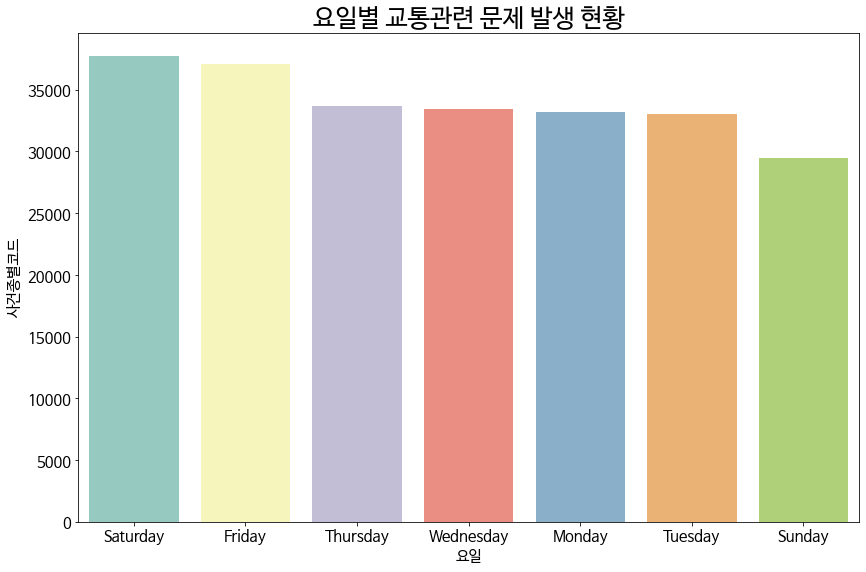

In [ ]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = days,
            x = days['요일'],
           y = days['사건종별코드'])
sns.set_palette('Set3')
plt.xticks(size=15)
plt.title('요일별 교통관련 문제 발생 현황', fontsize=25)
plt.show()

#### **요일별 + 사건종별 발생현황**

##### 전체 발생

In [ ]:
day_cat = df_day.groupby(['요일','사건종별코드'])[['사건종별코드']].count()

In [ ]:
day_cat.columns = ['카운트']
day_cat.reset_index(drop=False, inplace=True)
day_cat.head()

,요일,사건종별코드,카운트
0,Friday,교통불편,5256
1,Friday,교통사고,23604
2,Friday,교통위반,2890
3,Friday,사망.대형사고,2
4,Friday,음주운전,5350


Text(0, 0.5, '발생건수')

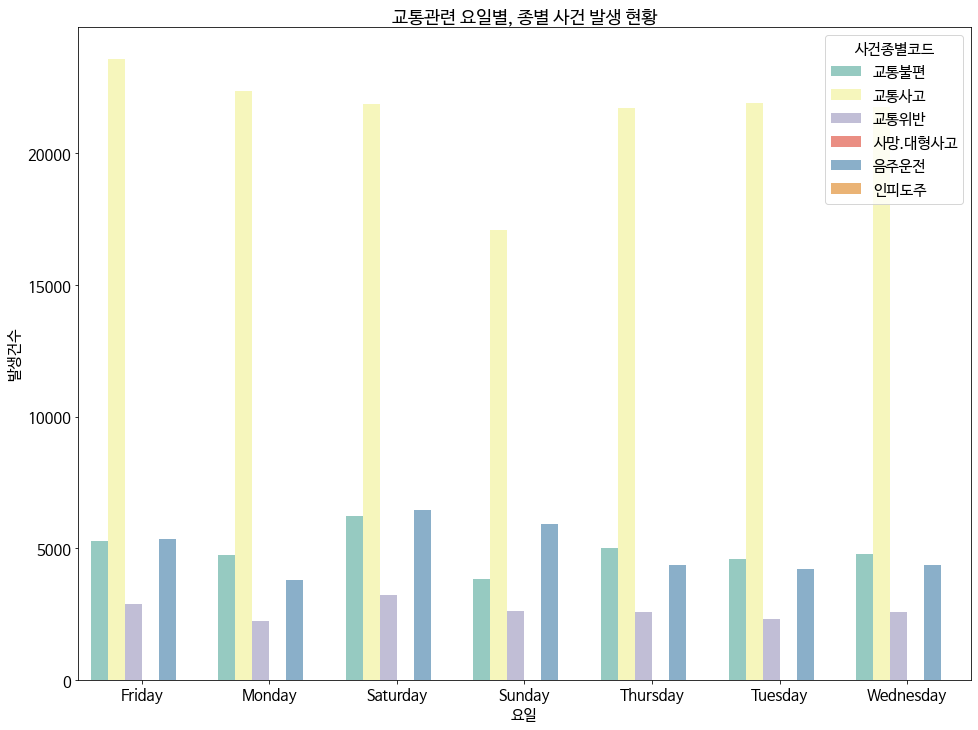

In [ ]:
rcParams['figure.figsize'] = 16,12
plt.title('교통관련 요일별, 종별 사건 발생 현황')
sns.barplot(x='요일', y='카운트', hue='사건종별코드', data = day_cat)
plt.xticks(fontsize=15)
plt.xlabel("요일", fontsize=15)
plt.ylabel("발생건수", fontsize=15)

##### 공휴일 여부별

In [ ]:
holi = df_day.groupby(['공휴일여부','사건종별코드'])[['사건종별코드']].count()

In [ ]:
holi.columns = ['카운트']
holi.reset_index(drop=False, inplace=True)
holi

,공휴일여부,사건종별코드,카운트
0,0,교통불편,32504
1,0,교통사고,143329
2,0,교통위반,17283
3,0,사망.대형사고,9
4,0,음주운전,32246
5,0,인피도주,28
6,1,교통불편,1913
7,1,교통사고,6980
8,1,교통위반,1102
9,1,음주운전,2214


In [ ]:
holi['비율'] = 0
for i in range(len(holi)):
    if holi['공휴일여부'][i]==0:
        holi['비율'][i] = holi['카운트'][i]/holi.groupby('공휴일여부')['카운트'].sum()[0]
    else:
        holi['비율'][i] = holi['카운트'][i]/holi.groupby('공휴일여부')['카운트'].sum()[1]

holi['비율'] = round(holi['비율'],2)

In [ ]:
holi.head()

,공휴일여부,사건종별코드,카운트,비율
0,0,교통불편,32504,0
1,0,교통사고,143329,0
2,0,교통위반,17283,0
3,0,사망.대형사고,9,0
4,0,음주운전,32246,0


Text(0, 0.5, '발생건수')

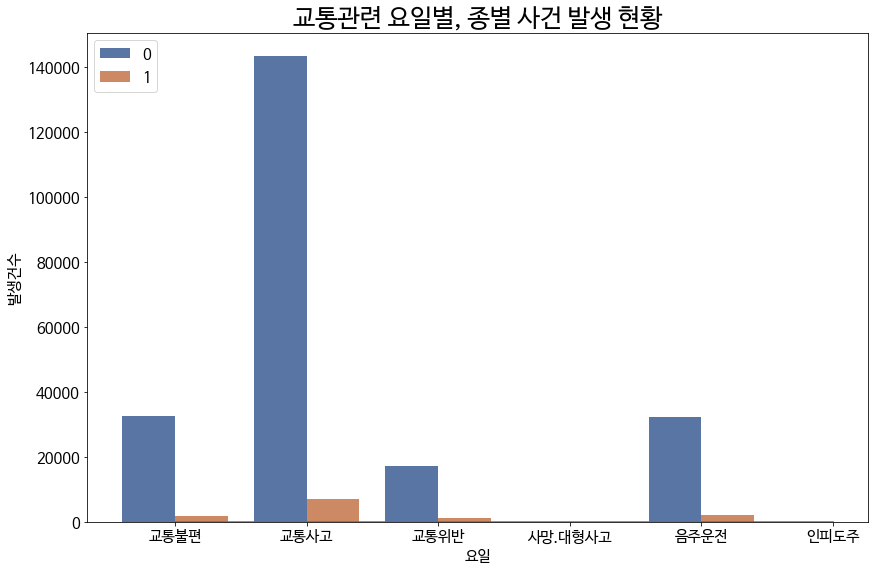

In [ ]:
rcParams['figure.figsize'] = 14, 9
sns.set_palette('deep')
plt.title('교통관련 요일별, 종별 사건 발생 현황', fontsize=25)
sns.barplot(x='사건종별코드', y='카운트', hue='공휴일여부', data = holi)
sns.lineplot(x='사건종별코드', y='비율', data=holi)
plt.xticks(fontsize=15)
plt.xlabel("요일", fontsize=15)
plt.ylabel("발생건수", fontsize=15)

Text(0, 0.5, '발생비율')

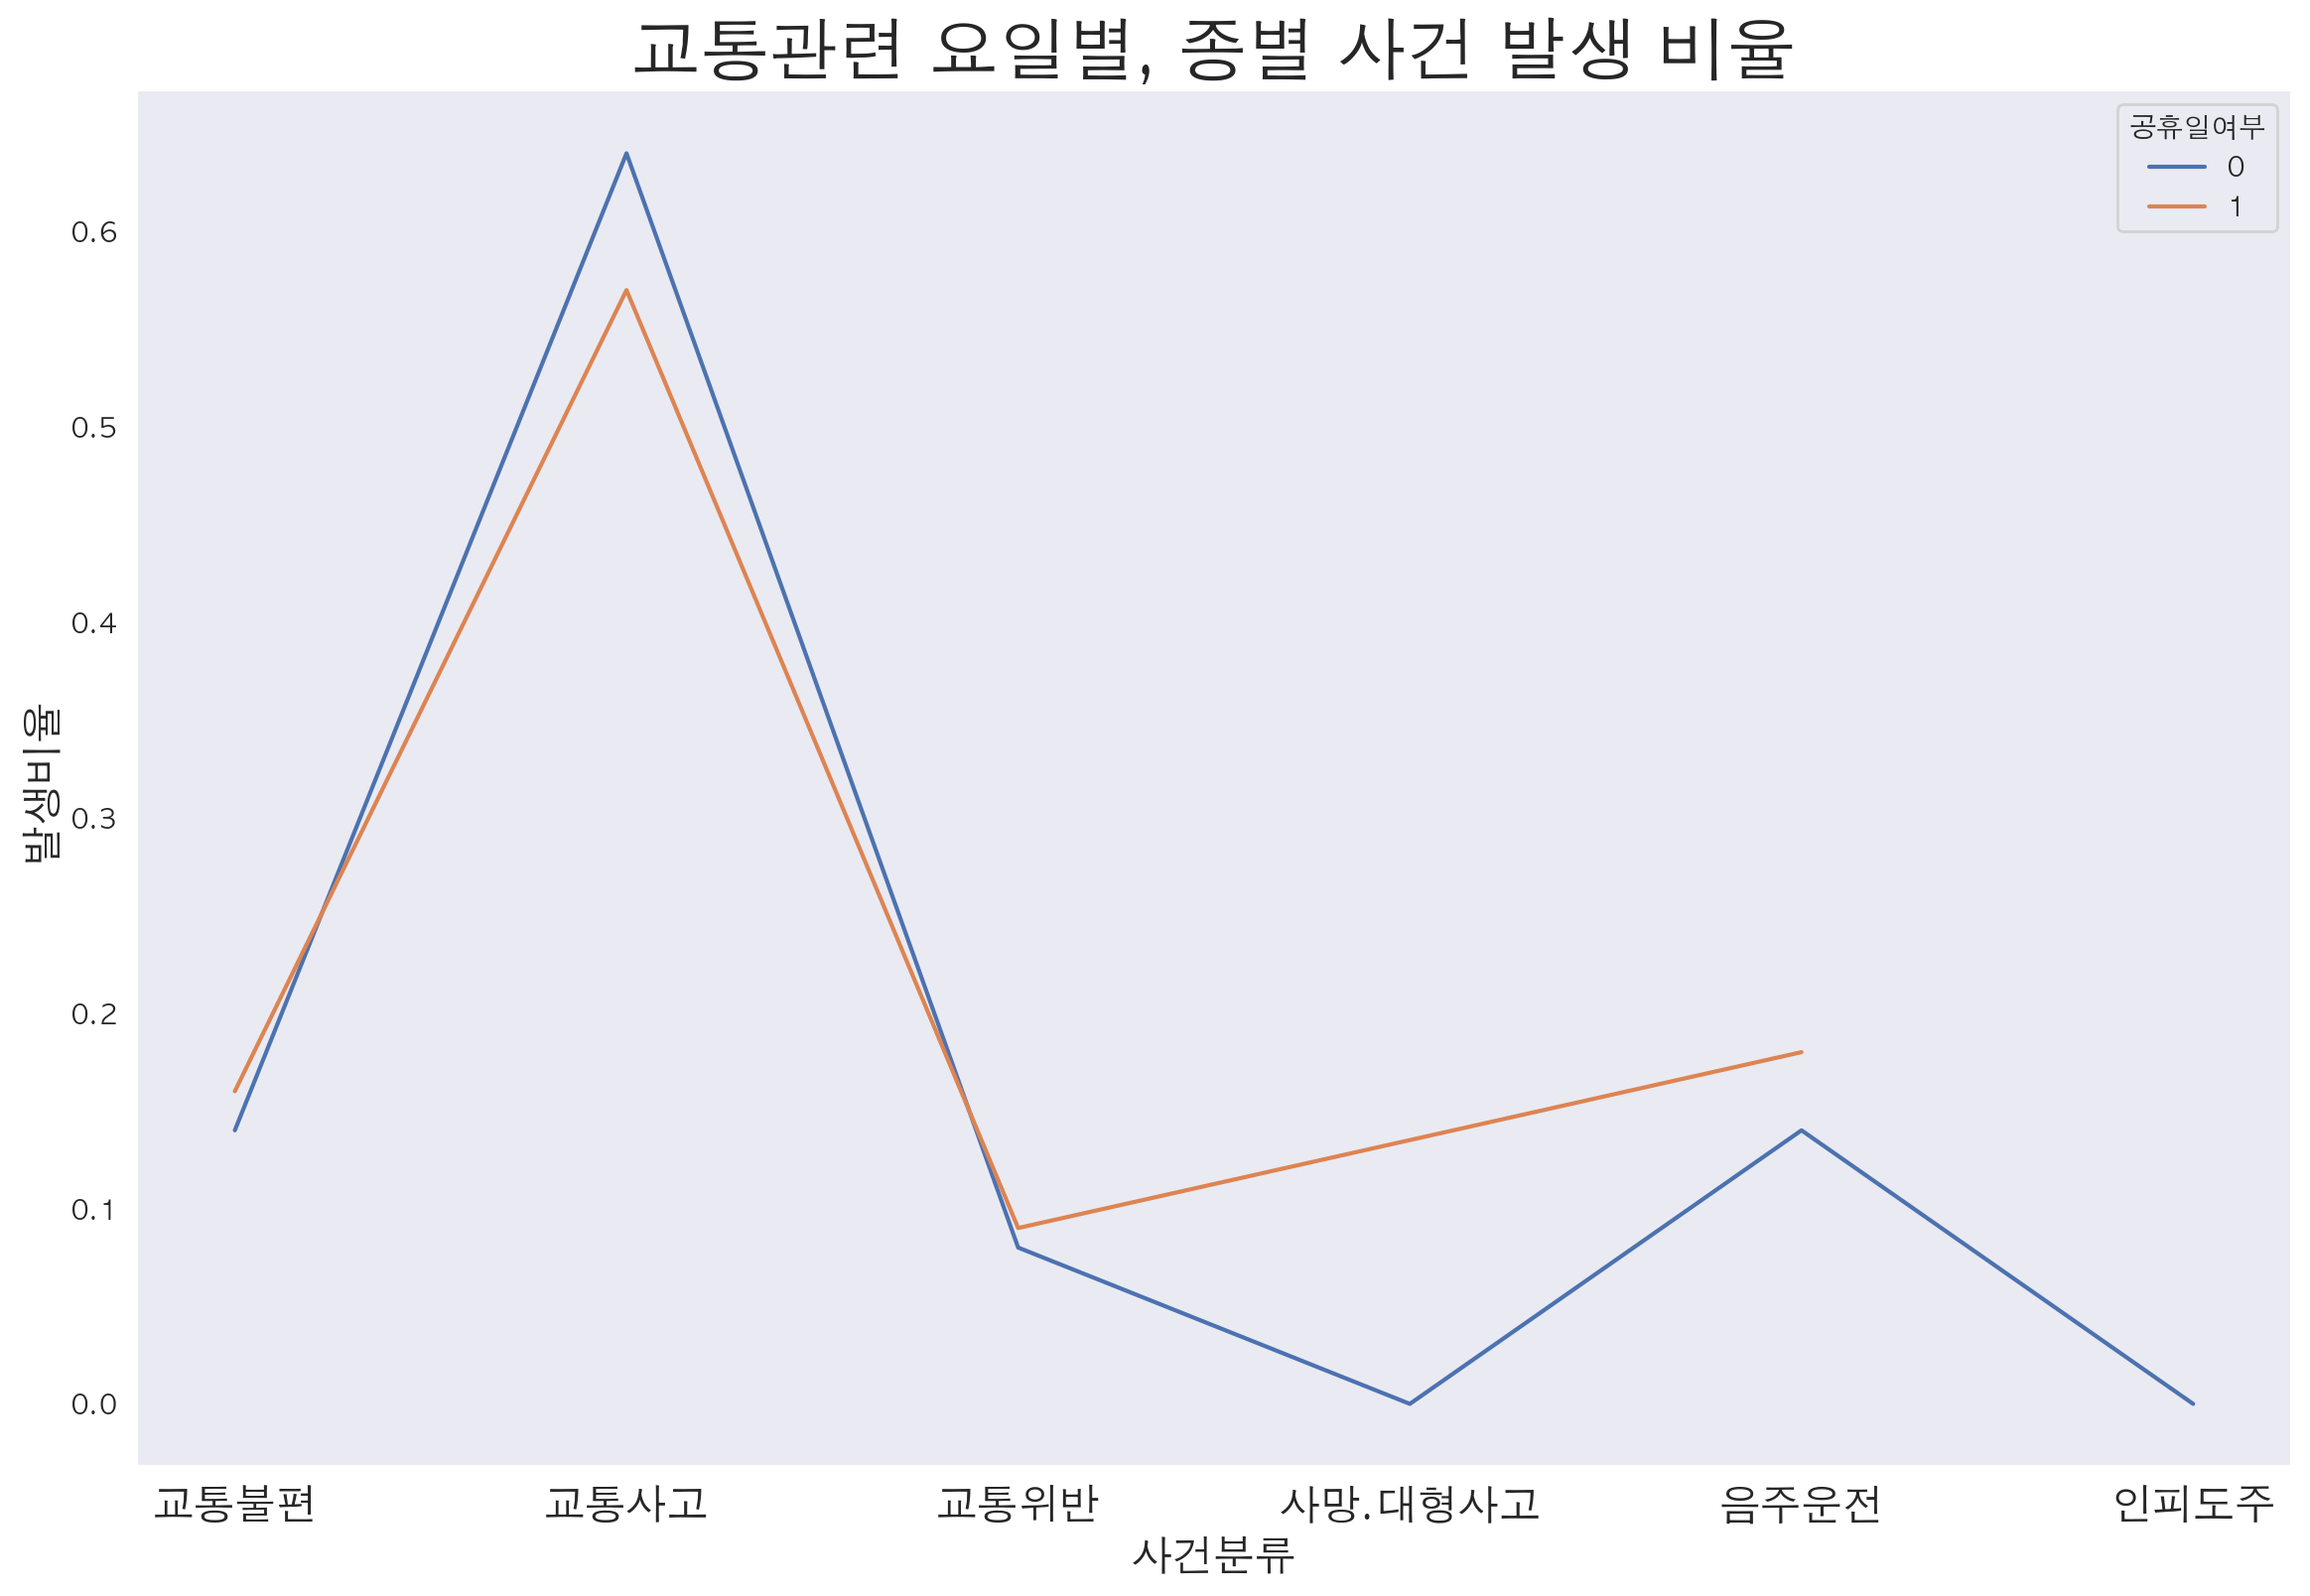

In [ ]:
sns.set_palette('deep')
plt.title('교통관련 요일별, 종별 사건 발생 비율', fontsize=25)
sns.lineplot(x='사건종별코드', y='비율', hue='공휴일여부',data=holi)
plt.xticks(fontsize=15)
plt.xlabel("사건분류", fontsize=15)
plt.ylabel("발생비율", fontsize=15)

## **성별과 사건분류**

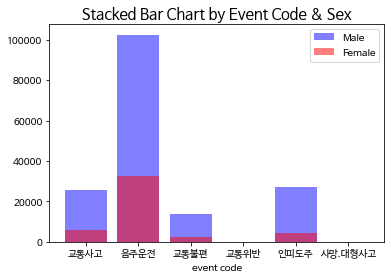

In [ ]:
male = df_new[df_new['성별'] == '남성'].groupby('사건종별코드').RECV_CPLT_DM.count()
female = df_new[df_new['성별'] == '여성'].groupby('사건종별코드').RECV_CPLT_DM.count()

label = ['교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고']
N = len(df_new['사건종별코드'].unique())
index = np.arange(N)
alpha = 0.5

p1 = plt.bar(index, male, color='b', alpha=alpha)
p2 = plt.bar(index, female, color='r', alpha=alpha)
plt.title('Stacked Bar Chart by Event Code & Sex', fontsize=15)
plt.xlabel('event code', fontsize=10)
plt.xticks(index, label, fontsize=10)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=10)
plt.show()

## **날씨와 사건분류**

### **습도**

In [ ]:
max(df_new['습도'])

100

In [ ]:
ranges=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df_new['습도_범주형'] = pd.cut(df_new['습도'],ranges)
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,성별,연월일,습도,강수량,평균기온,적설량,강수확률,풍속,강수형태,습도_범주형
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,남성,2020-01-01,65,0,2,0,30,1.1,0,"(60, 70]"
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,남성,2020-01-01,65,0,2,0,30,1.1,0,"(60, 70]"
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0,"(60, 70]"
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,남성,2020-01-01,65,0,2,0,30,1.1,0,"(60, 70]"
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,불상,2020-01-01,65,0,2,0,30,1.1,0,"(60, 70]"


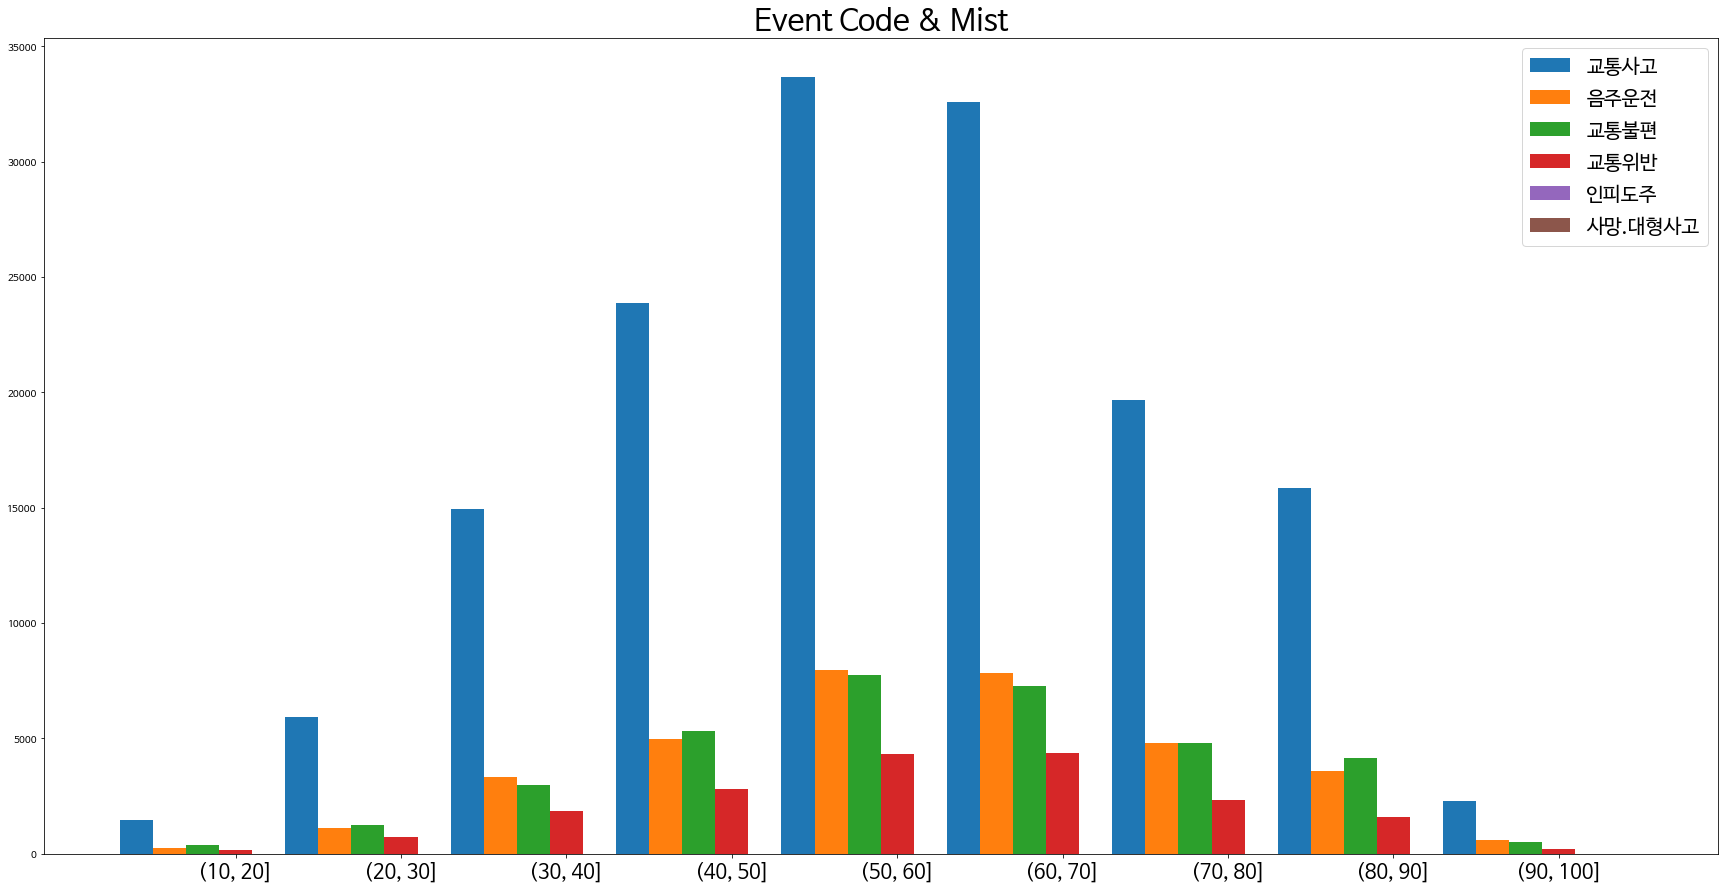

In [ ]:
df_new['습도_범주형'] = df_new['습도_범주형'].astype('str')

mist1 = df_new[df_new['사건종별코드'] == '교통사고'].groupby('습도_범주형').RECV_CPLT_DM.count().drop('nan')
mist2 = df_new[df_new['사건종별코드'] == '음주운전'].groupby('습도_범주형').RECV_CPLT_DM.count().drop('nan')
mist3 = df_new[df_new['사건종별코드'] == '교통불편'].groupby('습도_범주형').RECV_CPLT_DM.count().drop('nan')
mist4 = df_new[df_new['사건종별코드'] == '교통위반'].groupby('습도_범주형').RECV_CPLT_DM.count().drop('nan')
mist5 = df_new[df_new['사건종별코드'] == '인피도주'].groupby('습도_범주형').RECV_CPLT_DM.count()
mist6 = df_new[df_new['사건종별코드'] == '사망.대형사고'].groupby('습도_범주형').RECV_CPLT_DM.count()

mist5['(10, 20]'] = 0
mist5['(20, 30]'] = 0
mist6['(10, 20]'] = 0
mist6['(20, 30]'] = 0
mist6['(40, 50]'] = 0
mist6['(80, 90]'] = 0
mist6['(90, 100]'] = 0
mist5.sort_index(ascending=True, inplace = True)
mist6.sort_index(ascending=True, inplace = True)

label = ['(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]']
N = len(df_new['습도_범주형'].unique())
index = np.arange(N-1)
alpha = 0.5

plt.figure(figsize = (30, 15))
w = 0.2
p1 = plt.bar(index - 3 * w, mist1, width = w, label = '교통사고')
p2 = plt.bar(index - 2 * w, mist2, width = w, label = '음주운전')
p3 = plt.bar(index - w, mist3, width = w, label = '교통불편')
p4 = plt.bar(index, mist4, width = w, label = '교통위반')
p5 = plt.bar(index + w, mist5, width = w, label = '인피도주')
p6 = plt.bar(index + 2 * w, mist6, width = w, label = '사망.대형사고')

plt.legend()
plt.title('Event Code & Mist', fontsize=30)
plt.xticks(index, label, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고'), fontsize=20)
plt.show()

### **강수량**

In [ ]:
df_new['강수량'].value_counts()

0      191957
5       11981
40       8358
10       7390
20       7382
1        4321
70       2641
7        1067
4         962
3         814
9         406
2         370
100       213
Name: 강수량, dtype: int64

In [ ]:
ranges=[-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df_new['강수량_범주형'] = pd.cut(df_new['강수량'],ranges)

* 강수량 기준 사건 발생 건수

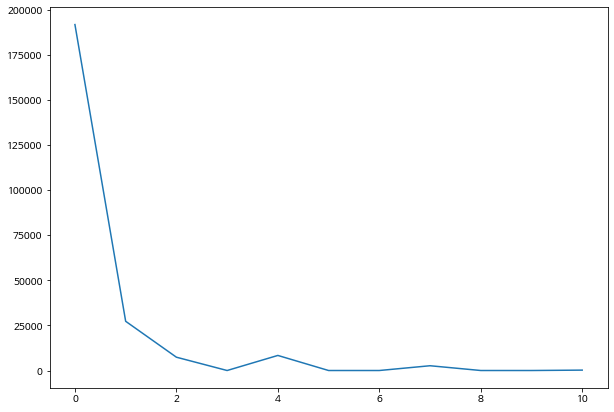

In [ ]:
avg_snow = pd.DataFrame(df_new['강수량_범주형'].value_counts()).sort_index()
plt.figure(figsize = (10, 7))
plt.plot(avg_snow.index, avg_snow['강수량_범주형'])
plt.show()

* 강수량 vs 사건분류

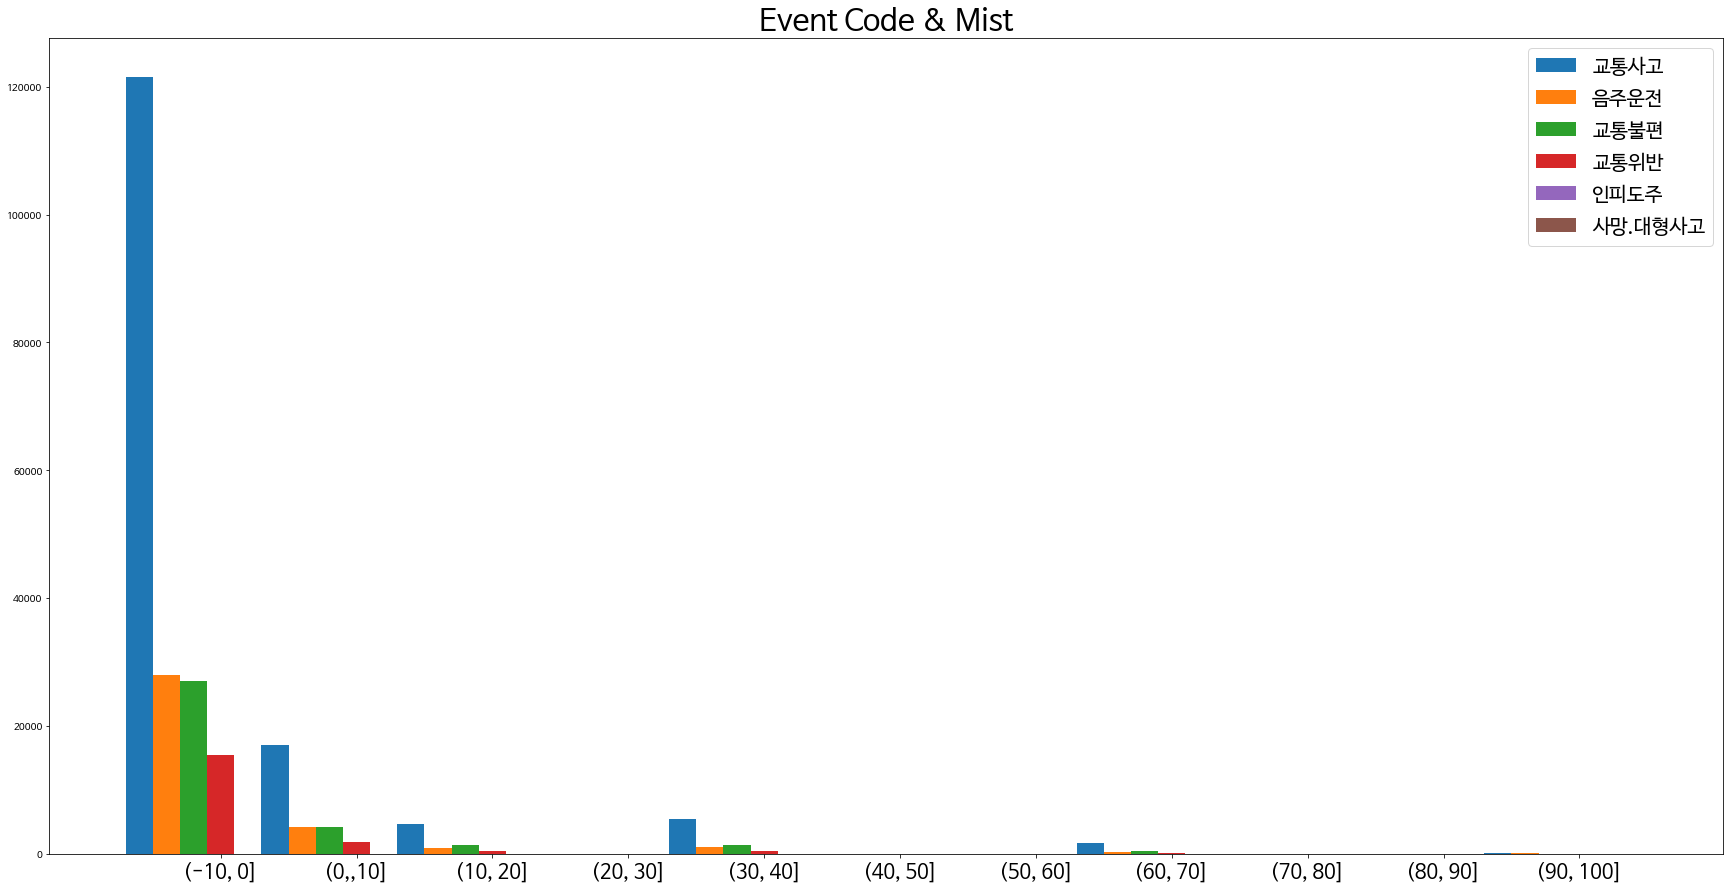

In [ ]:
rain1 = df_new[df_new['사건종별코드'] == '교통사고'].groupby('강수량_범주형').RECV_CPLT_DM.count()
rain2 = df_new[df_new['사건종별코드'] == '음주운전'].groupby('강수량_범주형').RECV_CPLT_DM.count()
rain3 = df_new[df_new['사건종별코드'] == '교통불편'].groupby('강수량_범주형').RECV_CPLT_DM.count()
rain4 = df_new[df_new['사건종별코드'] == '교통위반'].groupby('강수량_범주형').RECV_CPLT_DM.count()
rain5 = df_new[df_new['사건종별코드'] == '인피도주'].groupby('강수량_범주형').RECV_CPLT_DM.count()
rain6 = df_new[df_new['사건종별코드'] == '사망.대형사고'].groupby('강수량_범주형').RECV_CPLT_DM.count()

label = ['(-10, 0]', '(0,,10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]']
index = np.arange(11)
alpha = 0.5

plt.figure(figsize = (30, 15))
w = 0.2
p1 = plt.bar(index - 3 * w, rain1, width = w, label = '교통사고')
p2 = plt.bar(index - 2 * w, rain2, width = w, label = '음주운전')
p3 = plt.bar(index - w, rain3, width = w, label = '교통불편')
p4 = plt.bar(index, rain4, width = w, label = '교통위반')
p5 = plt.bar(index + w, rain5, width = w, label = '인피도주')
p6 = plt.bar(index + 2 * w, rain6, width = w, label = '사망.대형사고')

plt.legend()
plt.title('Event Code & Mist', fontsize=30)
plt.xticks(index, label, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고'), fontsize=20)
plt.show()

In [ ]:
df.columns

Index(['RECV_CPLT_DM', 'HPPN_PNU_ADDR', 'HPPN_X', 'HPPN_Y', 'SME_EVT_YN',
       '경찰청구분', '사건상태구분', '사건종별코드', '성별', '연월일', '습도', '강수량', '평균기온', '적설량',
       '강수확률', '풍속', '강수형태', '요일', 'do'],
      dtype='object')

### **적설량**
* cm 기준

In [ ]:
df_new['적설량'].value_counts()

0    235030
5      1659
1      1173
Name: 적설량, dtype: int64

In [ ]:
ranges=[1, 10, 20, 50, 60, 70, 80, 90]
df_new['적설량_범주형'] = pd.cut(df_new['적설량'],ranges)
df_new['적설량_범주형'].value_counts()

(1, 10]     1659
(10, 20]       0
(20, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]       0
(80, 90]       0
Name: 적설량_범주형, dtype: int64

* 적설량 기준 사고 발생 건수

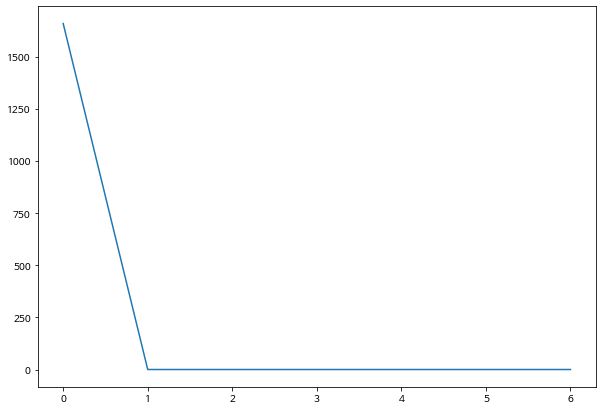

In [ ]:
avg_snow = pd.DataFrame(df_new['적설량_범주형'].value_counts()).sort_index()
plt.figure(figsize = (10, 7))
plt.plot(avg_snow.index, avg_snow['적설량_범주형'])
plt.show()

* 적설량 vs 사고분류

In [ ]:
avg_snow.index

CategoricalIndex([(1, 10], (10, 20], (20, 50], (50, 60], (60, 70], (70, 80],
                  (80, 90]],
                 categories=[(1, 10], (10, 20], (20, 50], (50, 60], (60, 70], (70, 80], (80, 90]], ordered=True, dtype='category')

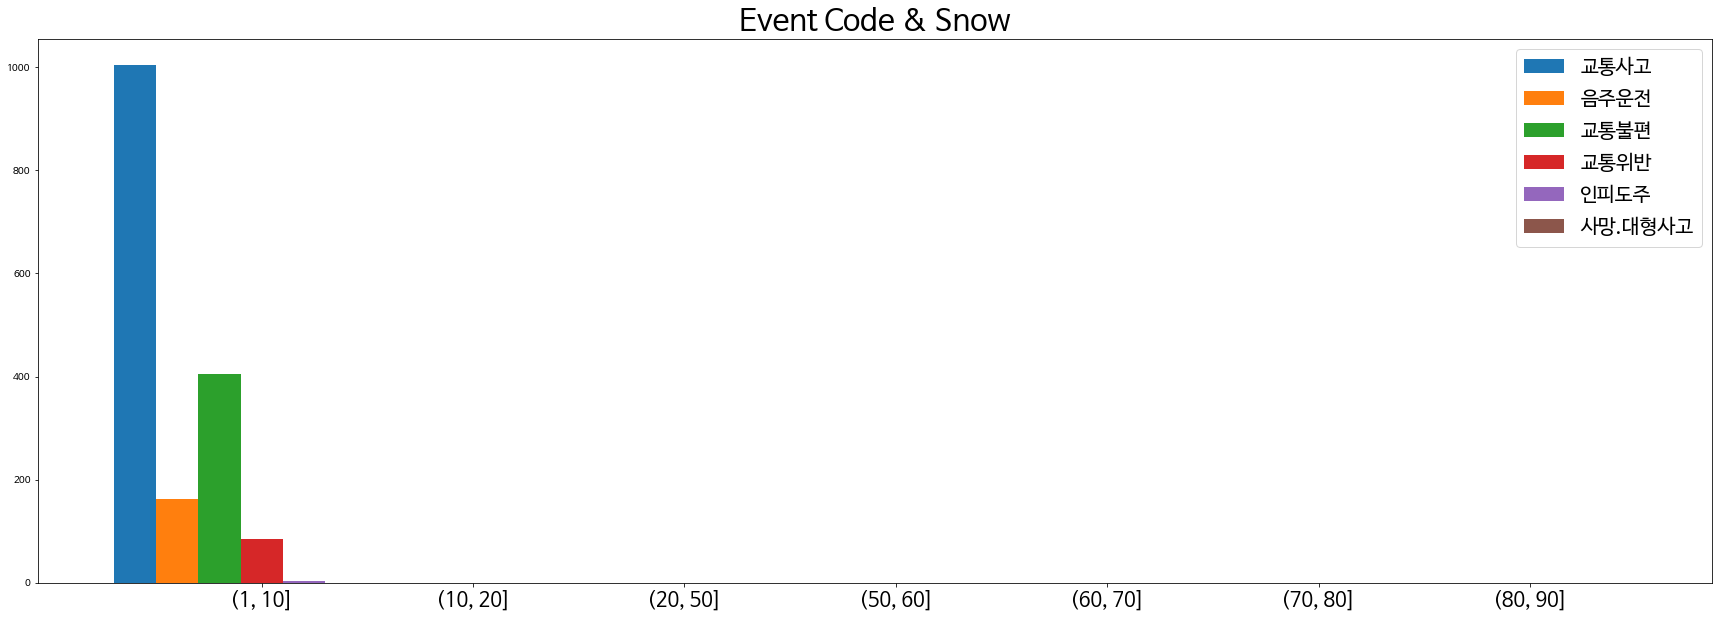

In [ ]:
snow1 = df_new[df_new['사건종별코드'] == '교통사고'].groupby('적설량_범주형').RECV_CPLT_DM.count()
snow2 = df_new[df_new['사건종별코드'] == '음주운전'].groupby('적설량_범주형').RECV_CPLT_DM.count()
snow3 = df_new[df_new['사건종별코드'] == '교통불편'].groupby('적설량_범주형').RECV_CPLT_DM.count()
snow4 = df_new[df_new['사건종별코드'] == '교통위반'].groupby('적설량_범주형').RECV_CPLT_DM.count()
snow5 = df_new[df_new['사건종별코드'] == '인피도주'].groupby('적설량_범주형').RECV_CPLT_DM.count()
snow6 = df_new[df_new['사건종별코드'] == '사망.대형사고'].groupby('적설량_범주형').RECV_CPLT_DM.count()

label = ['(1, 10]', '(10, 20]', '(20, 50]', '(50, 60]', '(60, 70]', '(70, 80]','(80, 90]']
index = np.arange(7)
alpha = 0.5

plt.figure(figsize = (30, 10))
w = 0.2
p1 = plt.bar(index - 3 * w, snow1, width = w, label = '교통사고')
p2 = plt.bar(index - 2 * w, snow2, width = w, label = '음주운전')
p3 = plt.bar(index - w, snow3, width = w, label = '교통불편')
p4 = plt.bar(index, snow4, width = w, label = '교통위반')
p5 = plt.bar(index + w, snow5, width = w, label = '인피도주')
p6 = plt.bar(index + 2 * w, snow6, width = w, label = '사망.대형사고')

plt.legend()
plt.title('Event Code & Snow', fontsize=30)
plt.xticks(index, label, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고'), fontsize=20)
plt.show()

### **평균기온**

In [ ]:
df_new['평균기온'].value_counts()

 26    16159
 22    12885
 25    12594
 27    12176
 23    11649
 24    11634
 28    10441
 21     8692
 29     8260
 15     7829
 14     7720
 12     6754
 7      6422
 18     6302
 20     6027
 17     5995
 30     5913
 16     5708
 11     5636
 8      5416
 13     5300
 3      5299
 9      4571
 6      4526
 2      4389
 10     4303
 19     4184
 31     3647
 5      3627
 1      3385
 32     3140
 33     2733
 4      2453
 0      2395
-1      2305
-3      2013
-4      1943
-2      1686
-5       715
-7       376
-11      334
-6       114
-9       109
-10       75
-8        28
Name: 평균기온, dtype: int64

In [ ]:
max(df_new['평균기온'])

33

In [ ]:
ranges=[-11, 0, 5, 10, 15, 20, 25, 30, 33]
df_new['평균기온_범주형'] = pd.cut(df_new['평균기온'],ranges)
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,...,강수량,평균기온,적설량,강수확률,풍속,강수형태,습도_범주형,강수량_범주형,적설량_범주형,평균기온_범주형
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,...,0,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]"
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,...,0,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]"
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,...,0,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]"
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,...,0,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]"
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,...,0,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]"


* 평균 기온에 따른 사고 발생 건수

In [ ]:
avg_tem = pd.DataFrame(df_new['평균기온_범주형'].value_counts()).sort_index()
avg_tem

,평균기온_범주형
"(-11, 0]",11759
"(0, 5]",19153
"(5, 10]",25238
"(10, 15]",33239
"(15, 20]",28216
"(20, 25]",57454
"(25, 30]",52949
"(30, 33]",9520


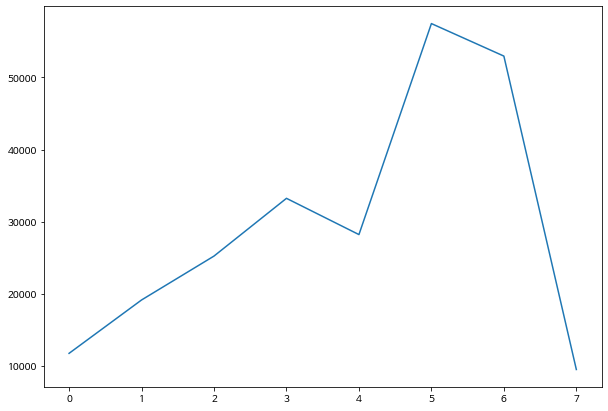

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(avg_tem.index, avg_tem['평균기온_범주형'])
plt.show()

In [ ]:
avg_tem.index

CategoricalIndex([(-11, 0], (0, 5], (5, 10], (10, 15], (15, 20], (20, 25],
                  (25, 30], (30, 33]],
                 categories=[(-11, 0], (0, 5], (5, 10], (10, 15], (15, 20], (20, 25], (25, 30], (30, 33]], ordered=True, dtype='category')

* 평균기온 vs 사건분류

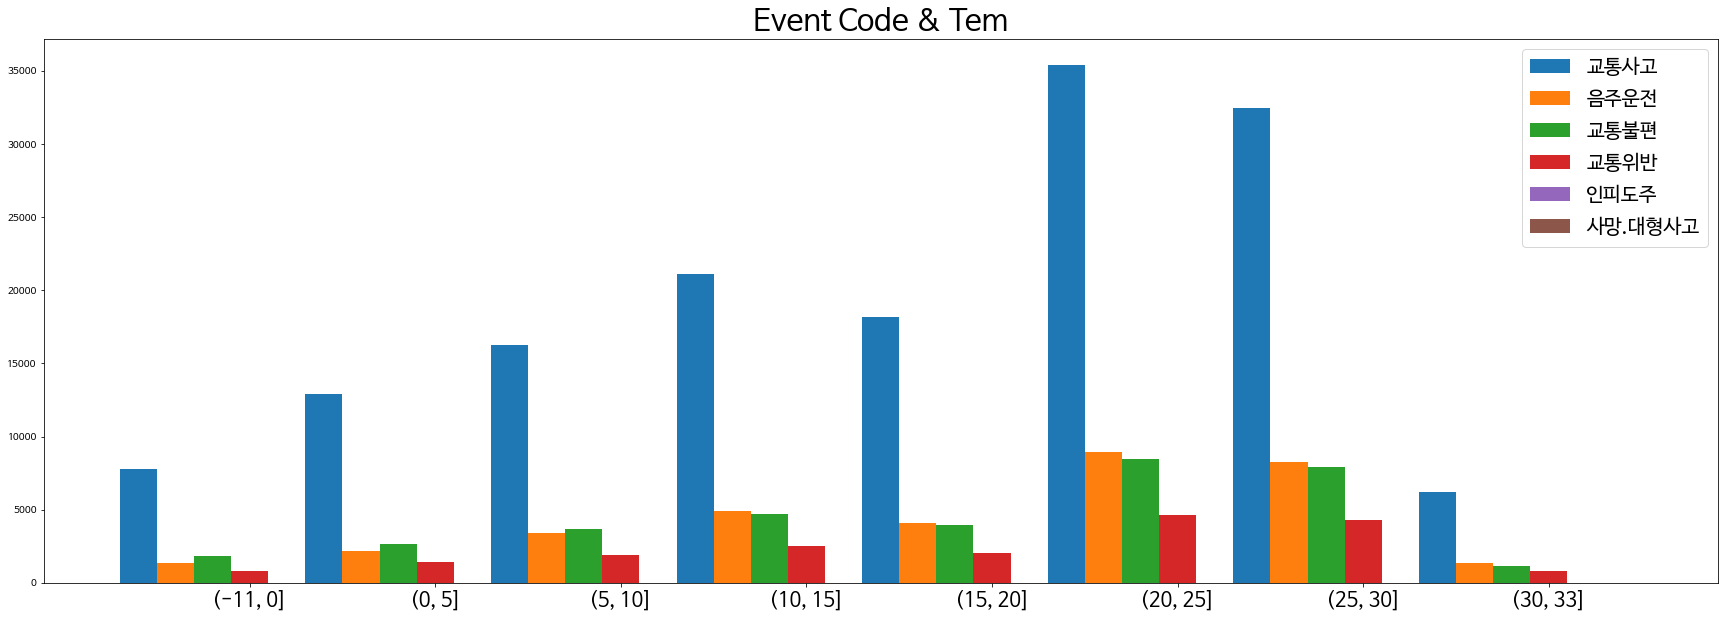

In [ ]:
tem1 = df_new[df_new['사건종별코드'] == '교통사고'].groupby('평균기온_범주형').RECV_CPLT_DM.count()
tem2 = df_new[df_new['사건종별코드'] == '음주운전'].groupby('평균기온_범주형').RECV_CPLT_DM.count()
tem3 = df_new[df_new['사건종별코드'] == '교통불편'].groupby('평균기온_범주형').RECV_CPLT_DM.count()
tem4 = df_new[df_new['사건종별코드'] == '교통위반'].groupby('평균기온_범주형').RECV_CPLT_DM.count()
tem5 = df_new[df_new['사건종별코드'] == '인피도주'].groupby('평균기온_범주형').RECV_CPLT_DM.count()
tem6 = df_new[df_new['사건종별코드'] == '사망.대형사고'].groupby('평균기온_범주형').RECV_CPLT_DM.count()

label = ['(-11, 0]', '(0, 5]', '(5, 10]', '(10, 15]', '(15, 20]', '(20, 25]',
         '(25, 30]', '(30, 33]']
index = np.arange(8)
alpha = 0.5

plt.figure(figsize = (30, 10))
w = 0.2
p1 = plt.bar(index - 3 * w, tem1, width = w, label = '교통사고')
p2 = plt.bar(index - 2 * w, tem2, width = w, label = '음주운전')
p3 = plt.bar(index - w, tem3, width = w, label = '교통불편')
p4 = plt.bar(index, tem4, width = w, label = '교통위반')
p5 = plt.bar(index + w, tem5, width = w, label = '인피도주')
p6 = plt.bar(index + 2 * w, tem6, width = w, label = '사망.대형사고')

plt.legend()
plt.title('Event Code & Tem', fontsize=30)
plt.xticks(index, label, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고'), fontsize=20)
plt.show()

### **풍속**
* 평균 풍속은 보통 1.9 ~ 2.9 사이
* 해당 표기법은 m/s인듯
* 태풍은 18 ~ 인데 최댓값이 16.7로 태풍은 없었던 듯

In [ ]:
df_new['풍속'].value_counts()

1.4     11552
1.2     11387
1.1     11096
1.6     10987
2.2     10001
        ...  
0.0       111
16.0       32
15.8       27
7.3        24
8.7        24
Name: 풍속, Length: 86, dtype: int64

In [ ]:
max(df_new['풍속'])

16.700001

In [ ]:
min(df_new['풍속'])

0.0

In [ ]:
ranges=[0, 1, 1.5, 2, 3, 4, 6, 8, 10, 16]
df_new['풍속_범주형'] = pd.cut(df_new['풍속'],ranges)
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,...,평균기온,적설량,강수확률,풍속,강수형태,습도_범주형,강수량_범주형,적설량_범주형,평균기온_범주형,풍속_범주형
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,...,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]","(1.0, 1.5]"
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,...,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]","(1.0, 1.5]"
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,...,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]","(1.0, 1.5]"
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,...,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]","(1.0, 1.5]"
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,...,2,0,30,1.1,0,"(60, 70]","(-10, 0]",NaN,"(0, 5]","(1.0, 1.5]"


In [ ]:
df_new['풍속_범주형'].value_counts()

(2.0, 3.0]      61782
(1.0, 1.5]      51879
(1.5, 2.0]      42930
(3.0, 4.0]      32730
(0.0, 1.0]      21565
(4.0, 6.0]      20774
(6.0, 8.0]       2935
(8.0, 10.0]      2134
(10.0, 16.0]      486
Name: 풍속_범주형, dtype: int64

* 풍속 기준 사건 발생 건수

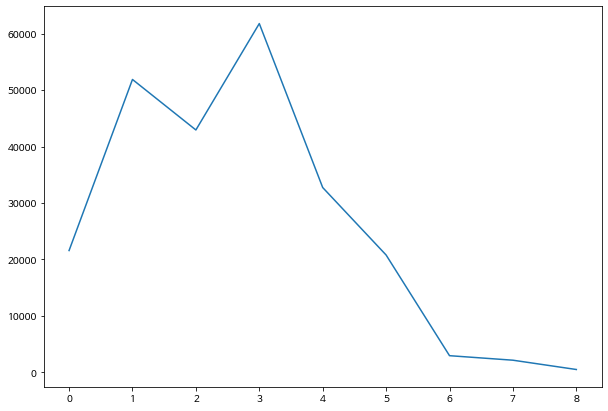

In [ ]:
avg_snow = pd.DataFrame(df_new['풍속_범주형'].value_counts()).sort_index()
plt.figure(figsize = (10, 7))
plt.plot(avg_snow.index, avg_snow['풍속_범주형'])
plt.show()

* 풍속 vs 사건분류

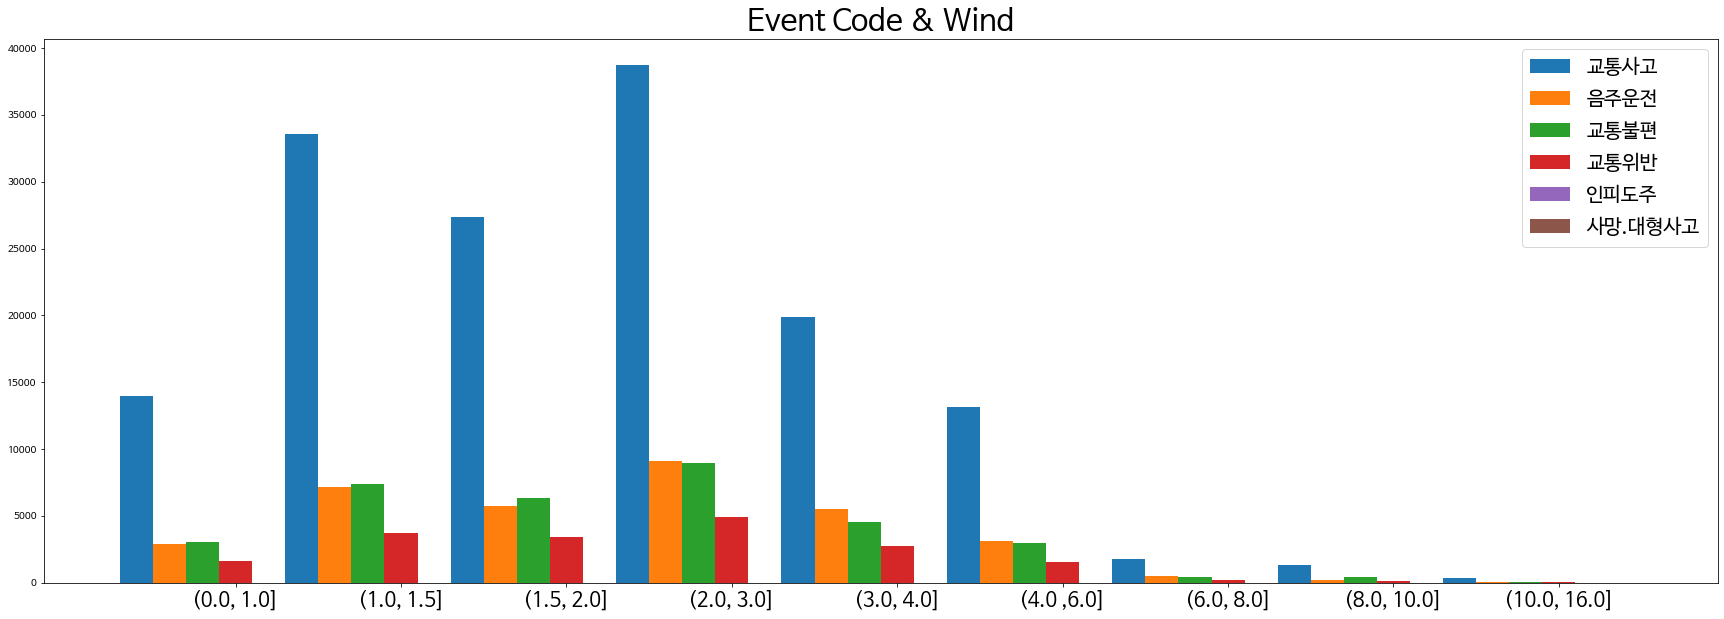

In [ ]:
wind1 = df_new[df_new['사건종별코드'] == '교통사고'].groupby('풍속_범주형').RECV_CPLT_DM.count()
wind2 = df_new[df_new['사건종별코드'] == '음주운전'].groupby('풍속_범주형').RECV_CPLT_DM.count()
wind3 = df_new[df_new['사건종별코드'] == '교통불편'].groupby('풍속_범주형').RECV_CPLT_DM.count()
wind4 = df_new[df_new['사건종별코드'] == '교통위반'].groupby('풍속_범주형').RECV_CPLT_DM.count()
wind5 = df_new[df_new['사건종별코드'] == '인피도주'].groupby('풍속_범주형').RECV_CPLT_DM.count()
wind6 = df_new[df_new['사건종별코드'] == '사망.대형사고'].groupby('풍속_범주형').RECV_CPLT_DM.count()

label = ['(0.0, 1.0]', '(1.0, 1.5]', '(1.5, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0 ,6.0]',
         '(6.0, 8.0]', '(8.0, 10.0]', '(10.0, 16.0]']
index = np.arange(9)
alpha = 0.5

plt.figure(figsize = (30, 10))
w = 0.2
p1 = plt.bar(index - 3 * w, wind1, width = w, label = '교통사고')
p2 = plt.bar(index - 2 * w, wind2, width = w, label = '음주운전')
p3 = plt.bar(index - w, wind3, width = w, label = '교통불편')
p4 = plt.bar(index, wind4, width = w, label = '교통위반')
p5 = plt.bar(index + w, wind5, width = w, label = '인피도주')
p6 = plt.bar(index + 2 * w, wind6, width = w, label = '사망.대형사고')

plt.legend()
plt.title('Event Code & Wind', fontsize=30)
plt.xticks(index, label, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고'), fontsize=20)
plt.show()

### **강수확률**

In [ ]:
df_new['강수확률'].value_counts()

0     89304
20    56592
30    45710
60    21175
80     7655
70     7607
10     6547
90     1039
64      559
23      322
62      284
69      272
71      209
77      202
27      146
72      125
13      112
66        2
Name: 강수확률, dtype: int64

In [ ]:
max(df_new['강수확률'])

90

In [ ]:
ranges=[0, 1, 10, 20, 50, 60, 70, 80, 90]
df_new['강수확률_범주형'] = pd.cut(df_new['강수확률'],ranges)
df_new['강수확률_범주형'].value_counts()

(10, 20]    56704
(20, 50]    46178
(50, 60]    21175
(60, 70]     8724
(70, 80]     8191
(1, 10]      6547
(80, 90]     1039
(0, 1]          0
Name: 강수확률_범주형, dtype: int64

* 강수확률 기준 사건 발생 건수

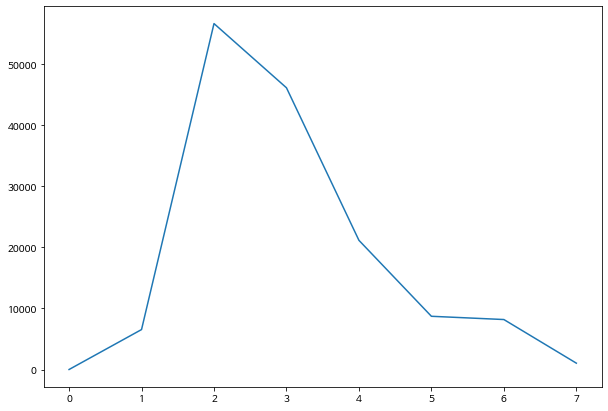

In [ ]:
avg_rain_per = pd.DataFrame(df_new['강수확률_범주형'].value_counts()).sort_index()
plt.figure(figsize = (10, 7))
plt.plot(avg_rain_per.index, avg_rain_per['강수확률_범주형'])
plt.show()

* 강수확률 vs 사건분류

In [ ]:
avg_rain_per.index

CategoricalIndex([(0, 1], (1, 10], (10, 20], (20, 50], (50, 60], (60, 70],
                  (70, 80], (80, 90]],
                 categories=[(0, 1], (1, 10], (10, 20], (20, 50], (50, 60], (60, 70], (70, 80], (80, 90]], ordered=True, dtype='category')

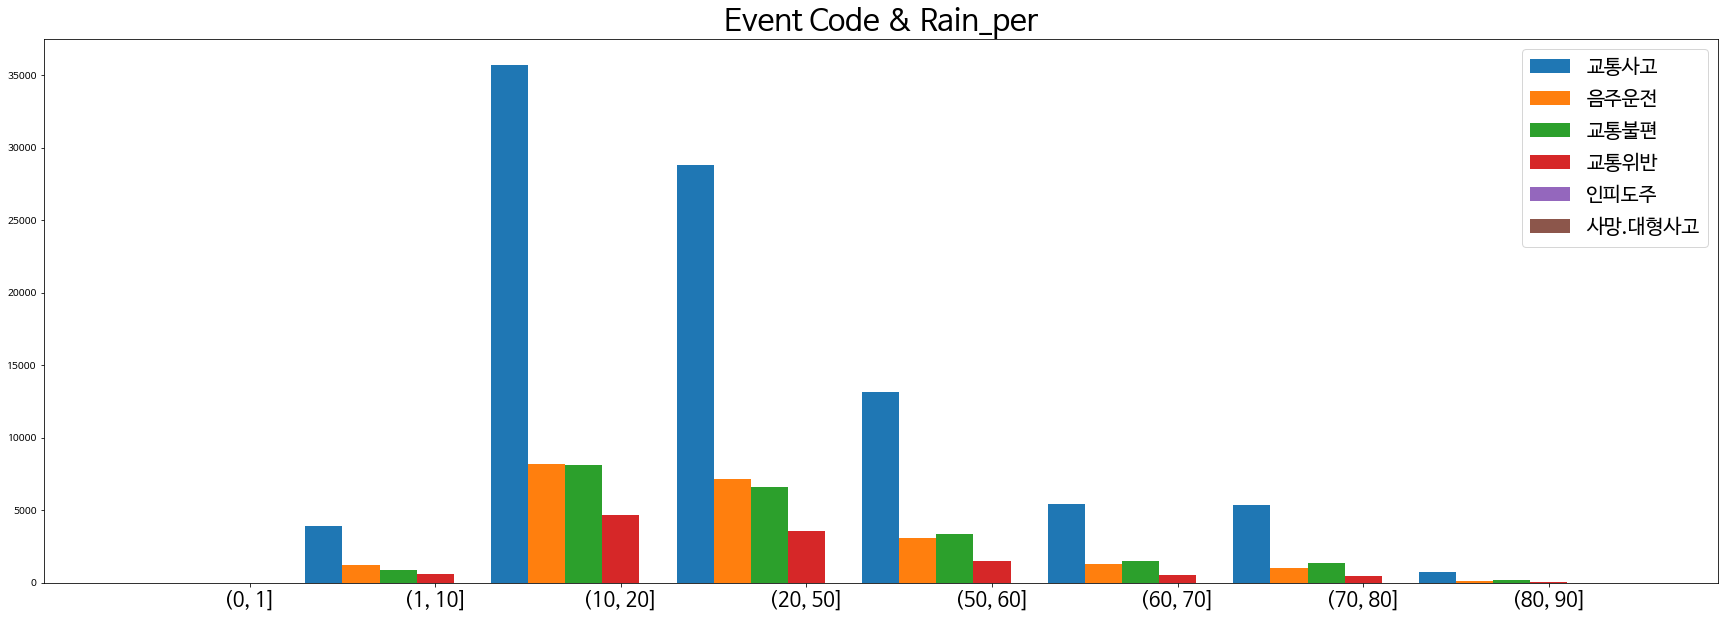

In [ ]:
rain_per1 = df_new[df_new['사건종별코드'] == '교통사고'].groupby('강수확률_범주형').RECV_CPLT_DM.count()
rain_per2 = df_new[df_new['사건종별코드'] == '음주운전'].groupby('강수확률_범주형').RECV_CPLT_DM.count()
rain_per3 = df_new[df_new['사건종별코드'] == '교통불편'].groupby('강수확률_범주형').RECV_CPLT_DM.count()
rain_per4 = df_new[df_new['사건종별코드'] == '교통위반'].groupby('강수확률_범주형').RECV_CPLT_DM.count()
rain_per5 = df_new[df_new['사건종별코드'] == '인피도주'].groupby('강수확률_범주형').RECV_CPLT_DM.count()
rain_per6 = df_new[df_new['사건종별코드'] == '사망.대형사고'].groupby('강수확률_범주형').RECV_CPLT_DM.count()

label = ['(0, 1]', '(1, 10]', '(10, 20]', '(20, 50]', '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]']
index = np.arange(8)
alpha = 0.5

plt.figure(figsize = (30, 10))
w = 0.2
p1 = plt.bar(index - 3 * w, rain_per1, width = w, label = '교통사고')
p2 = plt.bar(index - 2 * w, rain_per2, width = w, label = '음주운전')
p3 = plt.bar(index - w, rain_per3, width = w, label = '교통불편')
p4 = plt.bar(index, rain_per4, width = w, label = '교통위반')
p5 = plt.bar(index + w, rain_per5, width = w, label = '인피도주')
p6 = plt.bar(index + 2 * w, rain_per6, width = w, label = '사망.대형사고')

plt.legend()
plt.title('Event Code & Rain_per', fontsize=30)
plt.xticks(index, label, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고'), fontsize=20)
plt.show()

### **강수형태**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237862 entries, 0 to 97611
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   RECV_CPLT_DM   237862 non-null  datetime64[ns]
 1   요일             237862 non-null  object        
 2   HPPN_PNU_ADDR  237862 non-null  object        
 3   지역             237862 non-null  object        
 4   HPPN_X         237608 non-null  float64       
 5   HPPN_Y         237608 non-null  float64       
 6   SME_EVT_YN     93888 non-null   object        
 7   경찰청구분          237862 non-null  object        
 8   사건상태구분         237862 non-null  object        
 9   사건종별코드         237862 non-null  object        
 10  성별             237862 non-null  object        
 11  연월일            237862 non-null  object        
 12  습도             237862 non-null  int64         
 13  강수량            237862 non-null  int64         
 14  평균기온           237862 non-null  int64         
 15  적

In [ ]:
df_new['강수형태'].replace([0, 1, 2, 3, 4], ['None', '비', '눈', '눈비', '벼락'], inplace = True)

In [ ]:
df_new['강수형태'].value_counts()

None    198733
비        27995
벼락        9070
눈비        1952
눈          112
Name: 강수형태, dtype: int64

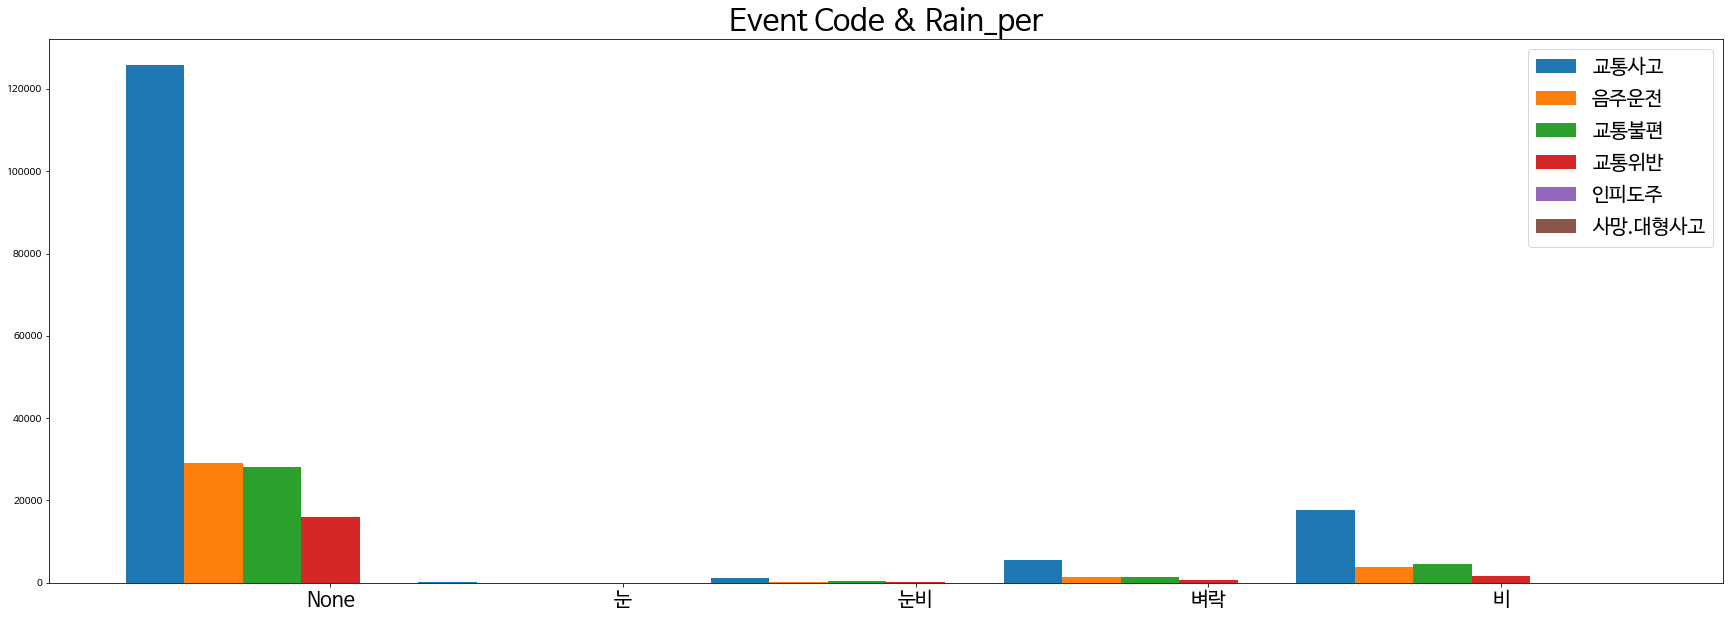

In [ ]:
rain_clf1 = df_new[df_new['사건종별코드'] == '교통사고'].groupby('강수형태').RECV_CPLT_DM.count()
rain_clf2 = df_new[df_new['사건종별코드'] == '음주운전'].groupby('강수형태').RECV_CPLT_DM.count()
rain_clf3 = df_new[df_new['사건종별코드'] == '교통불편'].groupby('강수형태').RECV_CPLT_DM.count()
rain_clf4 = df_new[df_new['사건종별코드'] == '교통위반'].groupby('강수형태').RECV_CPLT_DM.count()
rain_clf5 = df_new[df_new['사건종별코드'] == '인피도주'].groupby('강수형태').RECV_CPLT_DM.count()
rain_clf6 = df_new[df_new['사건종별코드'] == '사망.대형사고'].groupby('강수형태').RECV_CPLT_DM.count()

rain_clf5['눈'] = 0
rain_clf5['눈비'] = 0

label = ['None', '눈', '눈비', '벼락', '비']
index = np.arange(5)
alpha = 0.5

plt.figure(figsize = (30, 10))
w = 0.2
p1 = plt.bar(index - 3 * w, rain_clf1, width = w, label = '교통사고')
p2 = plt.bar(index - 2 * w, rain_clf2, width = w, label = '음주운전')
p3 = plt.bar(index - w, rain_clf3, width = w, label = '교통불편')
p4 = plt.bar(index, rain_clf4, width = w, label = '교통위반')
p5 = plt.bar(index + w, rain_clf5, width = w, label = '인피도주')
p6 = plt.bar(index + 2 * w, rain_clf6, width = w, label = '사망.대형사고')

plt.legend()
plt.title('Event Code & Rain_per', fontsize=30)
plt.xticks(index, label, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('교통사고', '음주운전', '교통불편', '교통위반', '인피도주', '사망.대형사고'), fontsize=20)
plt.show()

## **지도시각화**

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/BDA 교통사고 데이터 분석/') # 디렉토리 경로
!pip install config
!pip install folium
!pip install vworld_key
import config
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium import plugins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement vworld_key (from versions: none)
ERROR: No matching distribution found for vworld_key


In [ ]:
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,...,연도,월,일,시간,분,초,시간대,분기,시,경찰서명
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,...,2020,1,1,0,32,40,새벽,1분기,0,대전둔산경찰서
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,...,2020,1,1,0,35,32,새벽,1분기,0,대전유성경찰서
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,...,2020,1,1,0,21,35,새벽,1분기,0,대전유성경찰서
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,...,2020,1,1,0,43,1,새벽,1분기,0,대전중부경찰서
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,...,2020,1,1,18,43,35,퇴근시간,1분기,18,대전동부경찰서


In [ ]:
df_new.dropna(subset=['HPPN_X','HPPN_Y'], inplace = True)
df_new.reset_index(drop = True, inplace = True)
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,...,연도,월,일,시간,분,초,시간대,분기,시,경찰서명
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,...,2020,1,1,0,32,40,새벽,1분기,0,대전둔산경찰서
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,...,2020,1,1,0,35,32,새벽,1분기,0,대전유성경찰서
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,...,2020,1,1,0,21,35,새벽,1분기,0,대전유성경찰서
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,...,2020,1,1,0,43,1,새벽,1분기,0,대전중부경찰서
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,...,2020,1,1,18,43,35,퇴근시간,1분기,18,대전동부경찰서


In [ ]:
df_new[['HPPN_Y', 'HPPN_X']].iloc[:10]

,HPPN_Y,HPPN_X
0,36.346856,127.386346
1,36.360797,127.349989
2,36.353829,127.348625
3,36.328573,127.405055
4,36.345500,127.445780
5,36.323490,127.459160
6,36.327222,127.460556
7,36.326646,127.394136
8,36.439272,127.423358
9,36.331191,127.422760


In [ ]:
m_1 = folium.Map(location=[36.3,127.3], tiles='openstreetmap', zoom_start=10)
for idx, row in df_new.iloc[:1000].iterrows():
    Marker([row['HPPN_Y'], row['HPPN_X']]).add_to(m_1)
m_1

## **유동인구 및 신고수 상관관계**

In [ ]:
col_headers = ['경찰서명', '년월일', '신고수',
               '유동인구수01_06시간대', '유동인구수07_12시간대', '유동인구수13_18시간대', '유동인구수19_00시간대',
               '10대유동인구수', '20대유동인구수', '30대유동인구수', '40대유동인구수', '50대유동인구수', '60대유동인구수', '70대이상유동인구수']
df2 = pd.read_csv("/content/drive/MyDrive/교통사고/유동인구 데이터.csv", names = col_headers)

In [ ]:
# df1은 년, 월 모두 열로 추출
df_new['RECV_CPLT_DM'] = pd.to_datetime(df_new['RECV_CPLT_DM'])
df_new['Month'] = df_new['RECV_CPLT_DM'].dt.month
df_new['Year'] = df_new['RECV_CPLT_DM'].dt.year
df_new.head()

,RECV_CPLT_DM,요일,HPPN_PNU_ADDR,지역,HPPN_X,HPPN_Y,SME_EVT_YN,경찰청구분,사건상태구분,사건종별코드,...,시간,분,초,시간대,분기,시,경찰서명,공휴일여부,Month,Year
0,2020-01-01 00:32:40,Wednesday,대전광역시 서구 탄방동(탄방동) 1447-1,대전광역시,127.386346,36.346856,NaN,대전청,종결요청,교통불편,...,0,32,40,새벽,1분기,0,대전둔산경찰서,1,1,2020
1,2020-01-01 00:35:32,Wednesday,대전광역시 유성구 궁동(행정:온천2동) 423-8,대전광역시,127.349989,36.360797,NaN,대전청,종결요청,음주운전,...,0,35,32,새벽,1분기,0,대전유성경찰서,1,1,2020
2,2020-01-01 00:21:35,Wednesday,대전광역시 유성구 봉명동(행정:온천1동) 541-26,대전광역시,127.348625,36.353829,NaN,대전청,종결요청,교통사고,...,0,21,35,새벽,1분기,0,대전유성경찰서,1,1,2020
3,2020-01-01 00:43:01,Wednesday,대전광역시 중구 오류동(행정:오류동) 187-27,대전광역시,127.405055,36.328573,NaN,대전청,종결요청,교통사고,...,0,43,1,새벽,1분기,0,대전중부경찰서,1,1,2020
4,2020-01-01 18:43:35,Wednesday,대전광역시 동구 가양동 630,대전광역시,127.445780,36.345500,N,대전청,종결요청,교통사고,...,18,43,35,퇴근시간,1분기,18,대전동부경찰서,1,1,2020


In [ ]:
df_new['경찰서명'].value_counts()

천안서북경찰서    23775
아산경찰서      19799
대전유성경찰서    19279
천안동남경찰서    18004
대전둔산경찰서    15536
대전서부경찰서    15145
대전중부경찰서    14077
대전대덕경찰서    12796
당진경찰서      12471
대전동부경찰서    11558
서산경찰서      11227
세종남부경찰서     9919
논산경찰서       8924
공주경찰서       8674
보령경찰서       7797
홍성경찰서       5966
예산경찰서       4734
태안경찰서       4105
세종북부경찰서     3869
서천경찰서       2989
부여경찰서       2920
금산경찰서       2709
청양경찰서       1335
Name: 경찰서명, dtype: int64

In [ ]:
df2.head()

,경찰서명,년월일,신고수,유동인구수01_06시간대,유동인구수07_12시간대,유동인구수13_18시간대,유동인구수19_00시간대,10대유동인구수,20대유동인구수,30대유동인구수,40대유동인구수,50대유동인구수,60대유동인구수,70대이상유동인구수
0,가평경찰서,20190101,35,60340.61,196779.53,249064.18,91617.08,48161.40,89502.89,109558.49,121523.24,127495.30,76908.57,24873.81
1,가평경찰서,20190102,41,21464.30,150290.97,160914.54,45304.35,21460.23,50236.90,60596.64,81272.85,86678.40,56307.01,21650.59
2,가평경찰서,20190103,43,19158.73,145718.36,159325.49,44236.01,15261.95,44531.26,55300.99,76921.31,89038.29,63387.57,24230.38
3,가평경찰서,20190104,55,18516.16,156967.80,199607.21,69915.71,24872.95,58623.07,72926.12,97009.97,100669.23,66473.62,24652.76
4,가평경찰서,20190105,38,25643.60,206704.61,255110.69,75470.78,33778.27,75342.99,102500.46,122644.65,122185.34,79529.43,27164.08


In [ ]:
police_lst = ['천안서북경찰서', '아산경찰서', '대전유성경찰서', '천안동남경찰서', '대전둔산경찰서', '대전서부경찰서',
              '대전중부경찰서', '대전대덕경찰서', '당진경찰서', '대전동부경찰서', '서산경찰서', '세종남부경찰서',
              '논산경찰서',  '공주경찰서', '보령경찰서', '홍성경찰서', '예산경찰서', '태안경찰서', '세종북부경찰서',
              '서천경찰서', '부여경찰서', '금산경찰서', '청양경찰서']

df2 = df2[df2['경찰서명'].isin(police_lst)]
df2['경찰서명'].value_counts()

공주경찰서      365
금산경찰서      365
청양경찰서      365
천안서북경찰서    365
천안동남경찰서    365
예산경찰서      365
아산경찰서      365
서천경찰서      365
서산경찰서      365
부여경찰서      365
보령경찰서      365
대전중부경찰서    365
대전유성경찰서    365
대전서부경찰서    365
대전둔산경찰서    365
대전동부경찰서    365
대전대덕경찰서    365
당진경찰서      365
논산경찰서      365
홍성경찰서      365
Name: 경찰서명, dtype: int64

In [ ]:
# df1에는 있고 df2에는 존재하지 않는 경찰서 : 세종북부경찰서,세종남부경찰서, 태안경찰서 -> drop
idx1 = df_new[df_new['경찰서명'] == '세종북부경찰서'].index
idx2 = df_new[df_new['경찰서명'] == '세종남부경찰서'].index
idx3 = df_new[df_new['경찰서명'] == '태안경찰서'].index
df_new.drop(idx1, inplace = True)
df_new.drop(idx2, inplace = True)
df_new.drop(idx3, inplace = True)

In [ ]:
# df2에서 월만 따로 열로 추출
df2['년월일'] = pd.to_datetime(df2['년월일'], format = '%Y%m%d')
df2['Month'] = df2['년월일'].dt.month
df2.head()

,경찰서명,년월일,신고수,유동인구수01_06시간대,유동인구수07_12시간대,유동인구수13_18시간대,유동인구수19_00시간대,10대유동인구수,20대유동인구수,30대유동인구수,40대유동인구수,50대유동인구수,60대유동인구수,70대이상유동인구수,Month
5110,공주경찰서,2019-01-01,96,61521.02,349675.18,520380.54,144994.62,79207.53,137156.16,195305.71,245110.76,253447.36,129636.93,37030.96,1
5111,공주경찰서,2019-01-02,99,56336.01,331461.25,350420.95,111810.89,43631.36,86252.49,143088.26,211846.51,215139.44,114535.23,35868.13,1
5112,공주경찰서,2019-01-03,106,55303.66,334511.27,354407.53,117027.46,35783.30,80295.59,134232.09,208026.69,221975.36,136096.43,45187.23,1
5113,공주경찰서,2019-01-04,94,49410.64,311152.53,404264.16,162150.54,47287.47,102031.90,158066.98,225090.33,228473.62,126073.54,40287.02,1
5114,공주경찰서,2019-01-05,112,52065.02,406164.67,458803.14,145091.65,61661.36,111288.43,178452.64,242681.65,263832.94,156530.47,48028.27,1


In [ ]:
# 총 유동인구 열 생성
df2['총 유동인구수'] = df2['유동인구수01_06시간대'] + df2['유동인구수07_12시간대'] + df2['유동인구수13_18시간대'] + df2['유동인구수19_00시간대']

In [ ]:
# 경찰서별, 달 별 각 유동인구 변수의 평균으로 groupby
df2_group = round(df2.groupby(["경찰서명", 'Month']).mean(),2)
df2_group

신고수  유동인구수01_06시간대  유동인구수07_12시간대  유동인구수13_18시간대  \
경찰서명  Month                                                       
공주경찰서 1      78.00       51816.79      348651.00      402386.14   
      2      88.11       64310.79      393862.94      447411.94   
      3      87.10       60171.31      410504.29      463019.61   
      4      94.10       66596.86      389140.15      460627.65   
      5      89.06       72123.63      391372.36      460797.69   
...            ...            ...            ...            ...   
홍성경찰서 8      61.26       54570.37      223945.63      257101.43   
      9      62.57       58574.34      232176.85      272489.18   
      10     59.26       54099.23      231383.18      278593.11   
      11     55.03       51024.92      230160.53      273698.68   
      12     49.84       46531.50      205847.37      249275.30   

             유동인구수19_00시간대  10대유동인구수   20대유동인구수   30대유동인구수   40대유동인구수  \
경찰서명  Month                                                             
공주경찰서 1          130217.91  44951.18   94037.87  150846.97  221914.63   
      2          158196.90  62017.10  114731.13  174280.68  256079.34   
      3          156329.04  49605.05  104873.67  170523.53  255121.04   
      4          198452.88  52530.45   98299.61  167536.68  250888.57   
      5          213951.13  67961.09  104634.07  173728.25  262217.49   
...                    ...       ...        ...        ...        ...   
홍성경찰서 8          135560.68  53788.12   54724.33  106942.41  151397.63   
      9          132689.71  56839.71   58710.70  111210.01  158655.56   
      10         122008.98  51715.46   51292.00  104260.29  155247.23   
      11         119589.34  52206.94   50770.51  100682.20  151262.68   
      12         111041.20  50248.97   47239.80   91937.55  137721.05   

              50대유동인구수   60대유동인구수  70대이상유동인구수     총 유동인구수  
경찰서명  Month                                                
공주경찰서 1      236933.39  140079.70    44643.47   933071.84  
      2      260057.35  148659.62    48271.49  1063782.57  
      3      281444.82  172661.39    56148.99  1090024.25  
      4      286640.88  187401.07    71997.77  1114817.54  
      5      282528.22  179727.73    67921.17  1138244.80  
...                ...        ...         ...         ...  
홍성경찰서 8      156153.87  103150.57    45341.39   671178.12  
      9      160133.76  104404.16    46295.83   695930.09  
      10     162947.79  110620.36    50322.52   686084.51  
      11     162531.09  109261.57    48096.35   674473.47  
      12     145322.76   96646.65    43924.66   612695.37  

[240 rows x 13 columns]

### **2019 & 2019**

In [ ]:
corr_2019 = pd.DataFrame(df2.corr().iloc[0,:]).drop("Month").drop('신고수', axis = 0)
corr_2019

,신고수
유동인구수01_06시간대,0.784964
유동인구수07_12시간대,0.737085
유동인구수13_18시간대,0.786907
유동인구수19_00시간대,0.862185
10대유동인구수,0.811399
20대유동인구수,0.846224
30대유동인구수,0.788729
40대유동인구수,0.772940
50대유동인구수,0.748353
60대유동인구수,0.731106


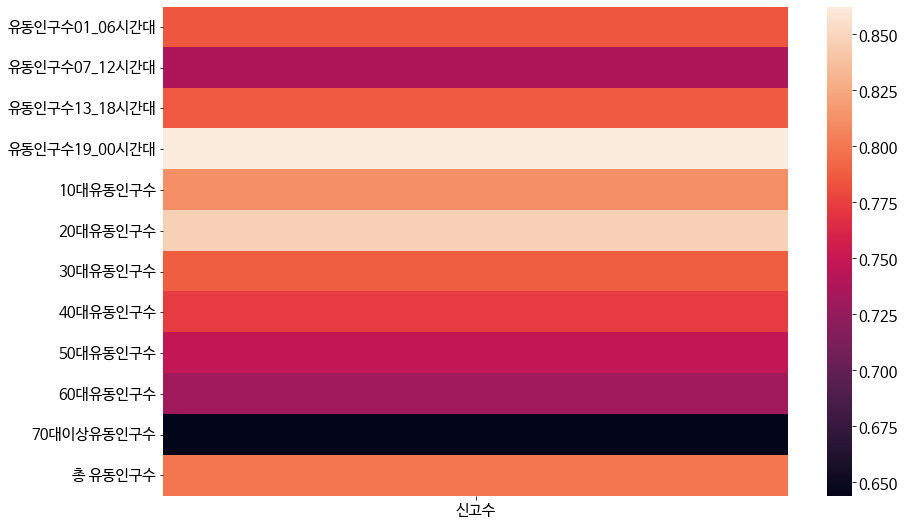

In [ ]:
sns.heatmap(corr_2019)

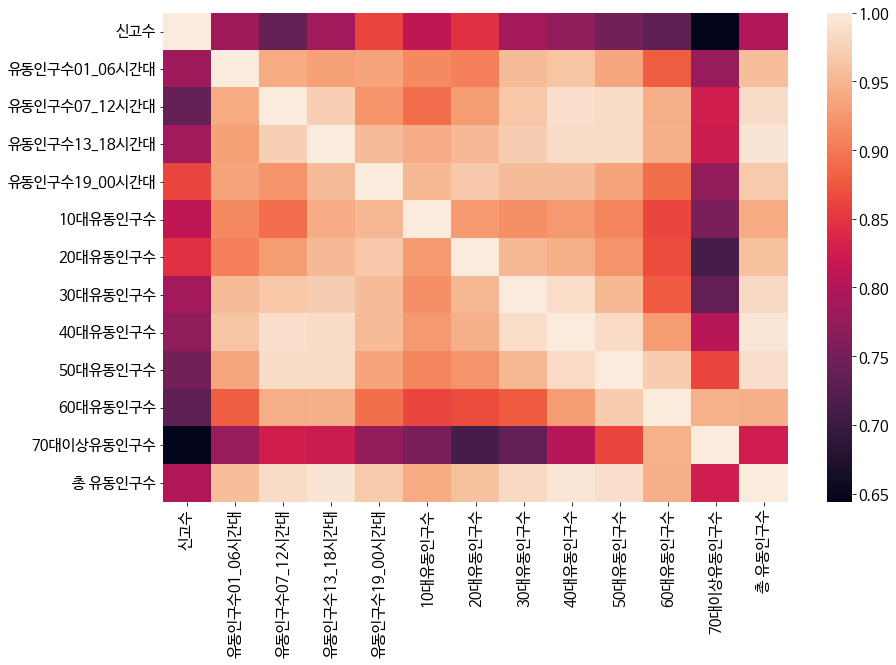

In [ ]:
sns.heatmap(df2.corr().drop('Month', axis = 1).drop('Month', axis = 0))

### **2019(유동인구) & 2020(사건수)**

In [ ]:
df_2020 = df_new[df_new['Year'] == 2020]

In [ ]:
df_2020_group = pd.DataFrame(df_2020.groupby(["경찰서명", 'Month']).count()['RECV_CPLT_DM'])

In [ ]:
df_2020_group.columns = ['count']
df_2020_group

count
경찰서명  Month       
공주경찰서 1        409
      2        311
      3        335
      4        413
      5        477
...            ...
홍성경찰서 8        336
      9        346
      10       403
      11       268
      12       201

[240 rows x 1 columns]

In [ ]:
pop = df2_group.drop('신고수', axis = 1)
pop

유동인구수01_06시간대  유동인구수07_12시간대  유동인구수13_18시간대  유동인구수19_00시간대  \
경찰서명  Month                                                               
공주경찰서 1           51816.79      348651.00      402386.14      130217.91   
      2           64310.79      393862.94      447411.94      158196.90   
      3           60171.31      410504.29      463019.61      156329.04   
      4           66596.86      389140.15      460627.65      198452.88   
      5           72123.63      391372.36      460797.69      213951.13   
...                    ...            ...            ...            ...   
홍성경찰서 8           54570.37      223945.63      257101.43      135560.68   
      9           58574.34      232176.85      272489.18      132689.71   
      10          54099.23      231383.18      278593.11      122008.98   
      11          51024.92      230160.53      273698.68      119589.34   
      12          46531.50      205847.37      249275.30      111041.20   

             10대유동인구수   20대유동인구수   30대유동인구수   40대유동인구수   50대유동인구수   60대유동인구수  \
경찰서명  Month                                                                    
공주경찰서 1      44951.18   94037.87  150846.97  221914.63  236933.39  140079.70   
      2      62017.10  114731.13  174280.68  256079.34  260057.35  148659.62   
      3      49605.05  104873.67  170523.53  255121.04  281444.82  172661.39   
      4      52530.45   98299.61  167536.68  250888.57  286640.88  187401.07   
      5      67961.09  104634.07  173728.25  262217.49  282528.22  179727.73   
...               ...        ...        ...        ...        ...        ...   
홍성경찰서 8      53788.12   54724.33  106942.41  151397.63  156153.87  103150.57   
      9      56839.71   58710.70  111210.01  158655.56  160133.76  104404.16   
      10     51715.46   51292.00  104260.29  155247.23  162947.79  110620.36   
      11     52206.94   50770.51  100682.20  151262.68  162531.09  109261.57   
      12     50248.97   47239.80   91937.55  137721.05  145322.76   96646.65   

             70대이상유동인구수     총 유동인구수  
경찰서명  Month                          
공주경찰서 1        44643.47   933071.84  
      2        48271.49  1063782.57  
      3        56148.99  1090024.25  
      4        71997.77  1114817.54  
      5        67921.17  1138244.80  
...                 ...         ...  
홍성경찰서 8        45341.39   671178.12  
      9        46295.83   695930.09  
      10       50322.52   686084.51  
      11       48096.35   674473.47  
      12       43924.66   612695.37  

[240 rows x 12 columns]

In [ ]:
df_final = pd.concat([pop, df_2020_group], axis = 1)
df_final

유동인구수01_06시간대  유동인구수07_12시간대  유동인구수13_18시간대  유동인구수19_00시간대  \
경찰서명  Month                                                               
공주경찰서 1           51816.79      348651.00      402386.14      130217.91   
      2           64310.79      393862.94      447411.94      158196.90   
      3           60171.31      410504.29      463019.61      156329.04   
      4           66596.86      389140.15      460627.65      198452.88   
      5           72123.63      391372.36      460797.69      213951.13   
...                    ...            ...            ...            ...   
홍성경찰서 8           54570.37      223945.63      257101.43      135560.68   
      9           58574.34      232176.85      272489.18      132689.71   
      10          54099.23      231383.18      278593.11      122008.98   
      11          51024.92      230160.53      273698.68      119589.34   
      12          46531.50      205847.37      249275.30      111041.20   

             10대유동인구수   20대유동인구수   30대유동인구수   40대유동인구수   50대유동인구수   60대유동인구수  \
경찰서명  Month                                                                    
공주경찰서 1      44951.18   94037.87  150846.97  221914.63  236933.39  140079.70   
      2      62017.10  114731.13  174280.68  256079.34  260057.35  148659.62   
      3      49605.05  104873.67  170523.53  255121.04  281444.82  172661.39   
      4      52530.45   98299.61  167536.68  250888.57  286640.88  187401.07   
      5      67961.09  104634.07  173728.25  262217.49  282528.22  179727.73   
...               ...        ...        ...        ...        ...        ...   
홍성경찰서 8      53788.12   54724.33  106942.41  151397.63  156153.87  103150.57   
      9      56839.71   58710.70  111210.01  158655.56  160133.76  104404.16   
      10     51715.46   51292.00  104260.29  155247.23  162947.79  110620.36   
      11     52206.94   50770.51  100682.20  151262.68  162531.09  109261.57   
      12     50248.97   47239.80   91937.55  137721.05  145322.76   96646.65   

             70대이상유동인구수     총 유동인구수  count  
경찰서명  Month                                 
공주경찰서 1        44643.47   933071.84    409  
      2        48271.49  1063782.57    311  
      3        56148.99  1090024.25    335  
      4        71997.77  1114817.54    413  
      5        67921.17  1138244.80    477  
...                 ...         ...    ...  
홍성경찰서 8        45341.39   671178.12    336  
      9        46295.83   695930.09    346  
      10       50322.52   686084.51    403  
      11       48096.35   674473.47    268  
      12       43924.66   612695.37    201  

[240 rows x 13 columns]

In [ ]:
corr_2020 = pd.DataFrame(df_final.corr().iloc[12,:]).drop('count')
corr_2020

,count
유동인구수01_06시간대,0.780785
유동인구수07_12시간대,0.705873
유동인구수13_18시간대,0.735252
유동인구수19_00시간대,0.802821
10대유동인구수,0.756645
20대유동인구수,0.768215
30대유동인구수,0.772634
40대유동인구수,0.744836
50대유동인구수,0.708819
60대유동인구수,0.646931


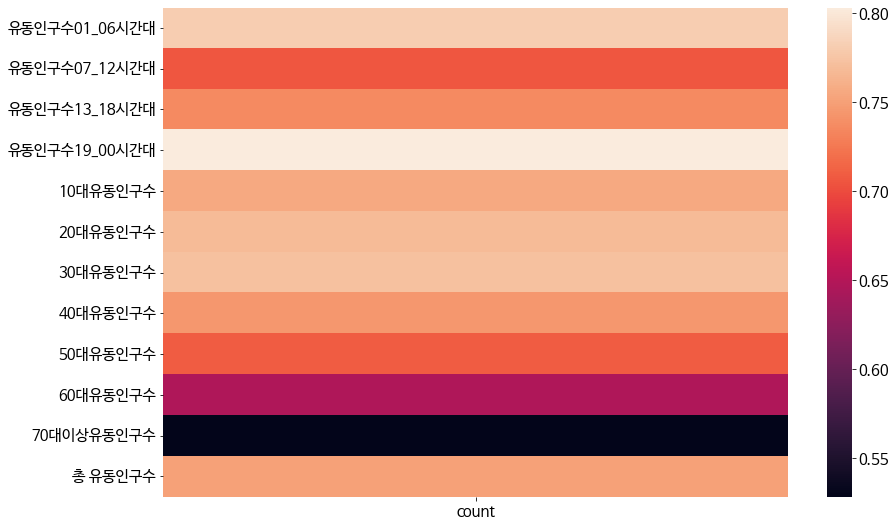

In [ ]:
sns.heatmap(corr_2020)

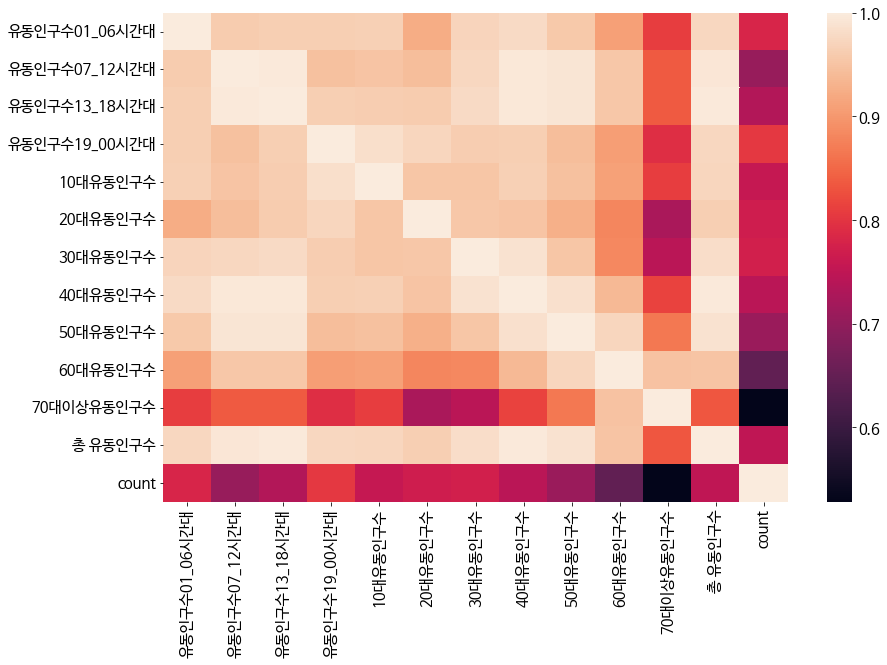

In [ ]:
sns.heatmap(df_final.corr())

### **2019(유동인구) & 2021(사건수)**

In [ ]:
df_2021 = df_new[df_new['Year'] == 2021]
df_2021 = pd.DataFrame(df_2021.groupby(["경찰서명", 'Month']).count()['RECV_CPLT_DM'])
df_2021.columns = ['count']
pop = df2_group.drop('신고수', axis = 1)
df_final = pd.concat([pop, df_2021], axis = 1)
corr_2021 = pd.DataFrame(df_final.corr().iloc[12,:]).drop('count')
corr_2021

,count
유동인구수01_06시간대,0.603803
유동인구수07_12시간대,0.565713
유동인구수13_18시간대,0.581682
유동인구수19_00시간대,0.653879
10대유동인구수,0.590861
20대유동인구수,0.633355
30대유동인구수,0.618841
40대유동인구수,0.589952
50대유동인구수,0.563904
60대유동인구수,0.511690


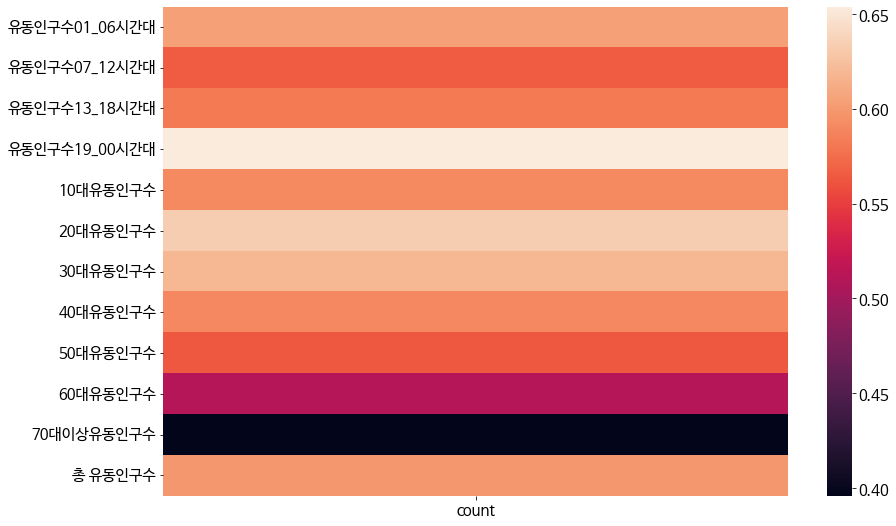

In [ ]:
sns.heatmap(corr_2021)

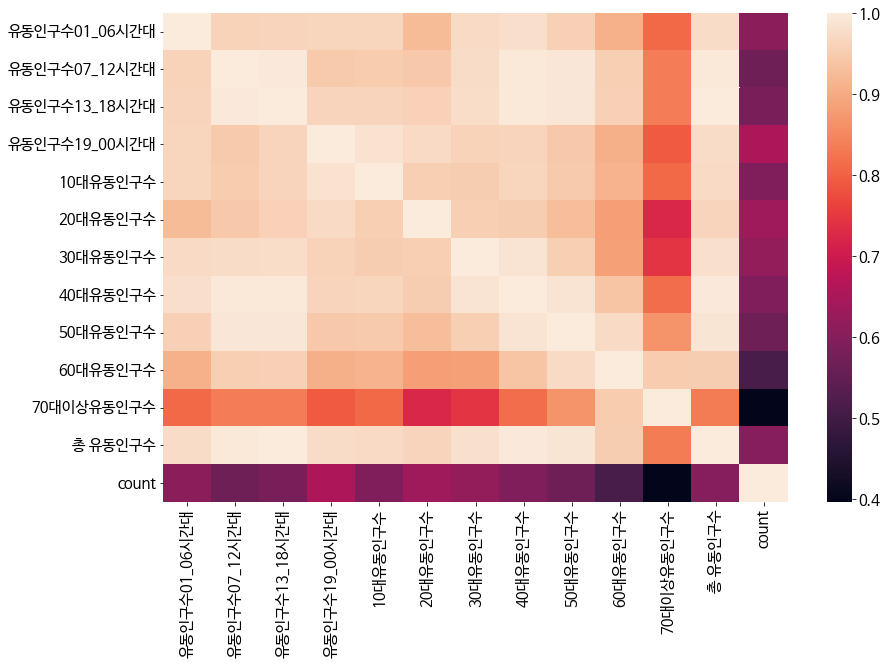

In [ ]:
sns.heatmap(df_final.corr())

# **모델링**

In [ ]:
ls1 = ['대전유성경찰서', '대전동부경찰서','대전둔산경찰서', '대전대덕경찰서', '대전서부경찰서', '대전중부경찰서']
ls2 = ['공주경찰서', '금산경찰서', '논산경찰서', '당진경찰서', '보령경찰서', '부여경찰서', '서산경찰서', '서천경찰서', '아산경찰서', '예산경찰서', '천안서북경찰서', '천안동남경찰서', '청양경찰서', '홍성경찰서', '태안경찰서']
df2 = df2[df2['경찰서명'].isin(ls1 + ls2)]

In [ ]:
df2.reset_index(inplace = True)
df2.drop('index', axis = 1, inplace = True)
df2.head()

In [ ]:
df2['년월일'] = pd.to_datetime(df2['년월일'], format = '%Y%m%d')

In [ ]:
import random

random.seed(1)

In [ ]:
tmp = 0
df2['위험도'] = np.NaN

for i in list(df2['경찰서명'].unique()) :
    q_25 = df2[df2['경찰서명'] == i]['신고수'].quantile(.25)
    q_50 = df2[df2['경찰서명'] == i]['신고수'].quantile(.50)
    q_75 = df2[df2['경찰서명'] == i]['신고수'].quantile(.75)
    for j in range(len(df2[df2['경찰서명'] == i])) :
        if df2[df2['경찰서명'] == i]['신고수'][tmp] <= q_25 :
            df2['위험도'][tmp] = 0
            tmp += 1
        elif (df2[df2['경찰서명'] == i]['신고수'][tmp] > q_25) & (df2[df2['경찰서명'] == i]['신고수'][tmp] <= q_50) :
            df2['위험도'][tmp] = 1
            tmp += 1
        elif (df2[df2['경찰서명'] == i]['신고수'][tmp] > q_50) & (df2[df2['경찰서명'] == i]['신고수'][tmp] <= q_75) :
            df2['위험도'][tmp] = 2
            tmp += 1
        else :
            df2['위험도'][tmp] = 3
            tmp += 1

df2

In [ ]:
X = df2[['유동인구수01_06시간대', '유동인구수07_12시간대', '유동인구수13_18시간대', '유동인구수19_00시간대', '신고수']]
Y = df2['위험도']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [ ]:
from scipy.stats import uniform, randint

params = {'n_estimators' : [50, 100, 150, 200],
          'max_depth' : [i for i in range(2, 20, 2)],
          'min_samples_leaf' : [i for i in range(2, 10, 2)],
          'min_samples_split' : [i for i in range(2, 10, 2)]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train_scaled, y_train)

In [ ]:
grid_cv.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, max_depth = 18, min_samples_leaf = 2, min_samples_split = 2, n_jobs = -1)

rf.fit(x_train, y_train)
rf.score(x_test, y_test)

accuracy : 0.804931506849315

In [ ]:
rf.predict(x_train.iloc[0].values.reshape(1, -1))